In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from mopet import mopet

from synchronization import plots
from synchronization import runner
from synchronization import constants

# ING Network

In this notebook we model two interconnected inhibitory networks. Gamma rhythm is created by ING mechanism.

We explore the effect on noise strength and try to replicate Meng & Rieckes result.

Based on our findings for the ING model, we move forward to the PING model.

In [95]:
params = {
    "runtime": 500.0,
    
    "ou_enabled": [False, False],
    
    "model_EI": False,
    
    "poisson_enabled": [True, True],
    "poisson_variance": 0.5,
    "poisson_p": 0.75,
    "poisson_size": 800,
    "poisson_mean_input": 200,
    "poisson_I_enabled": True,
    "poisson_I_ratio": 1.0,
    
    "N_pop": 2,
    "net_record_spikes": 200,    
    
    # Only Synaptic Strengths for I<->I.
    "J_ppee": 0.0,
    "J_ppei": 0.0,
    "J_ppii": 0.2,
    
    "J_itoi": 1.0,
    "J_etoe": 0.0,
    "J_etoi": 0.0,
    "J_itoe": 0.0,
    
    # Only connectivity for I to I, all-to-all.
    "p_ppee": 0.00,
    "p_ppei": 0.00,
    "p_ppii": 1.0,
    "p_etoi": 0.0,
    "p_etoe": 0,
    "p_itoe": 0.0,
    "p_itoi": 1.0,
    
    "syn_net_inh": True,
    "syn_net_exc": False,
    
    # Time Constants
    "tau_GABA": 9.0,
    
    #
    "N_e": 1,
    "N_i": 500,
}

## ING Network with weak coupling and weak noise

In [91]:
params_mid = dict(params)
params_mid.update({
    "runtime": 5000,
})

In [92]:
model = runner.run(
    modified_params=params_mid
)

Initializing net ...
Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
Poisson rate to I pop: 100.0
Net 2 - rate for single neuron 75.0
Initialization time: 0.3772730827331543s
Starting simulation at t=0. s for a duration of 5. s
1.3997 s (27%) simulated in 10s, estimated 26s remaining.
2.59735 s (51%) simulated in 20s, estimated 19s remaining.
3.7006 s (74%) simulated in 30s, estimated 11s remaining.
4.9369 s (98%) simulated in 40s, estimated 1s remaining.
5. s (100%) simulated in 40s
runtime: 46.6


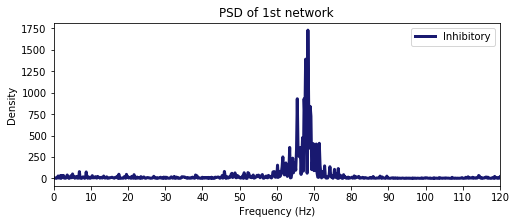

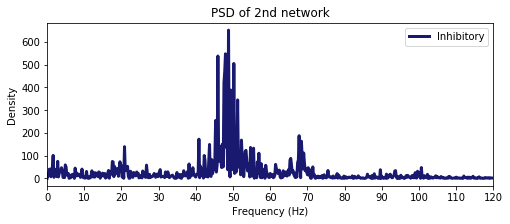

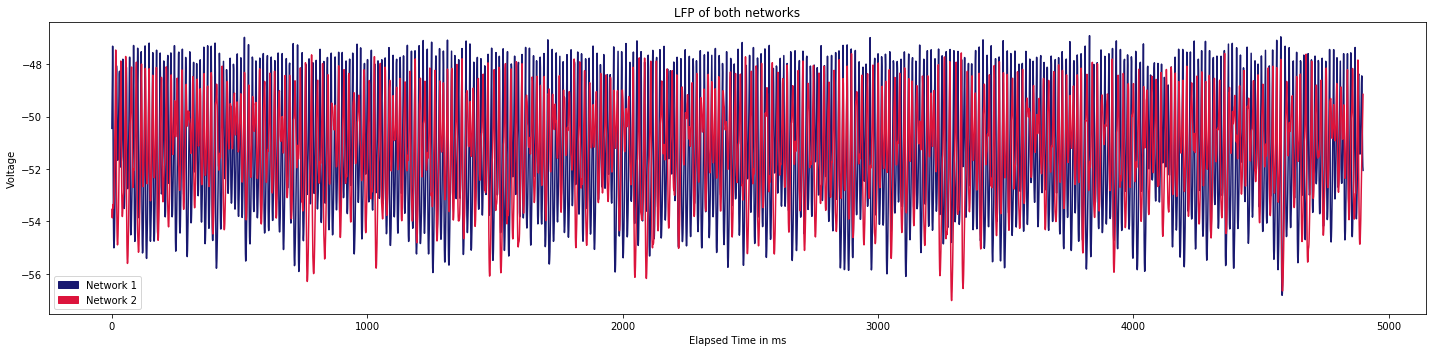

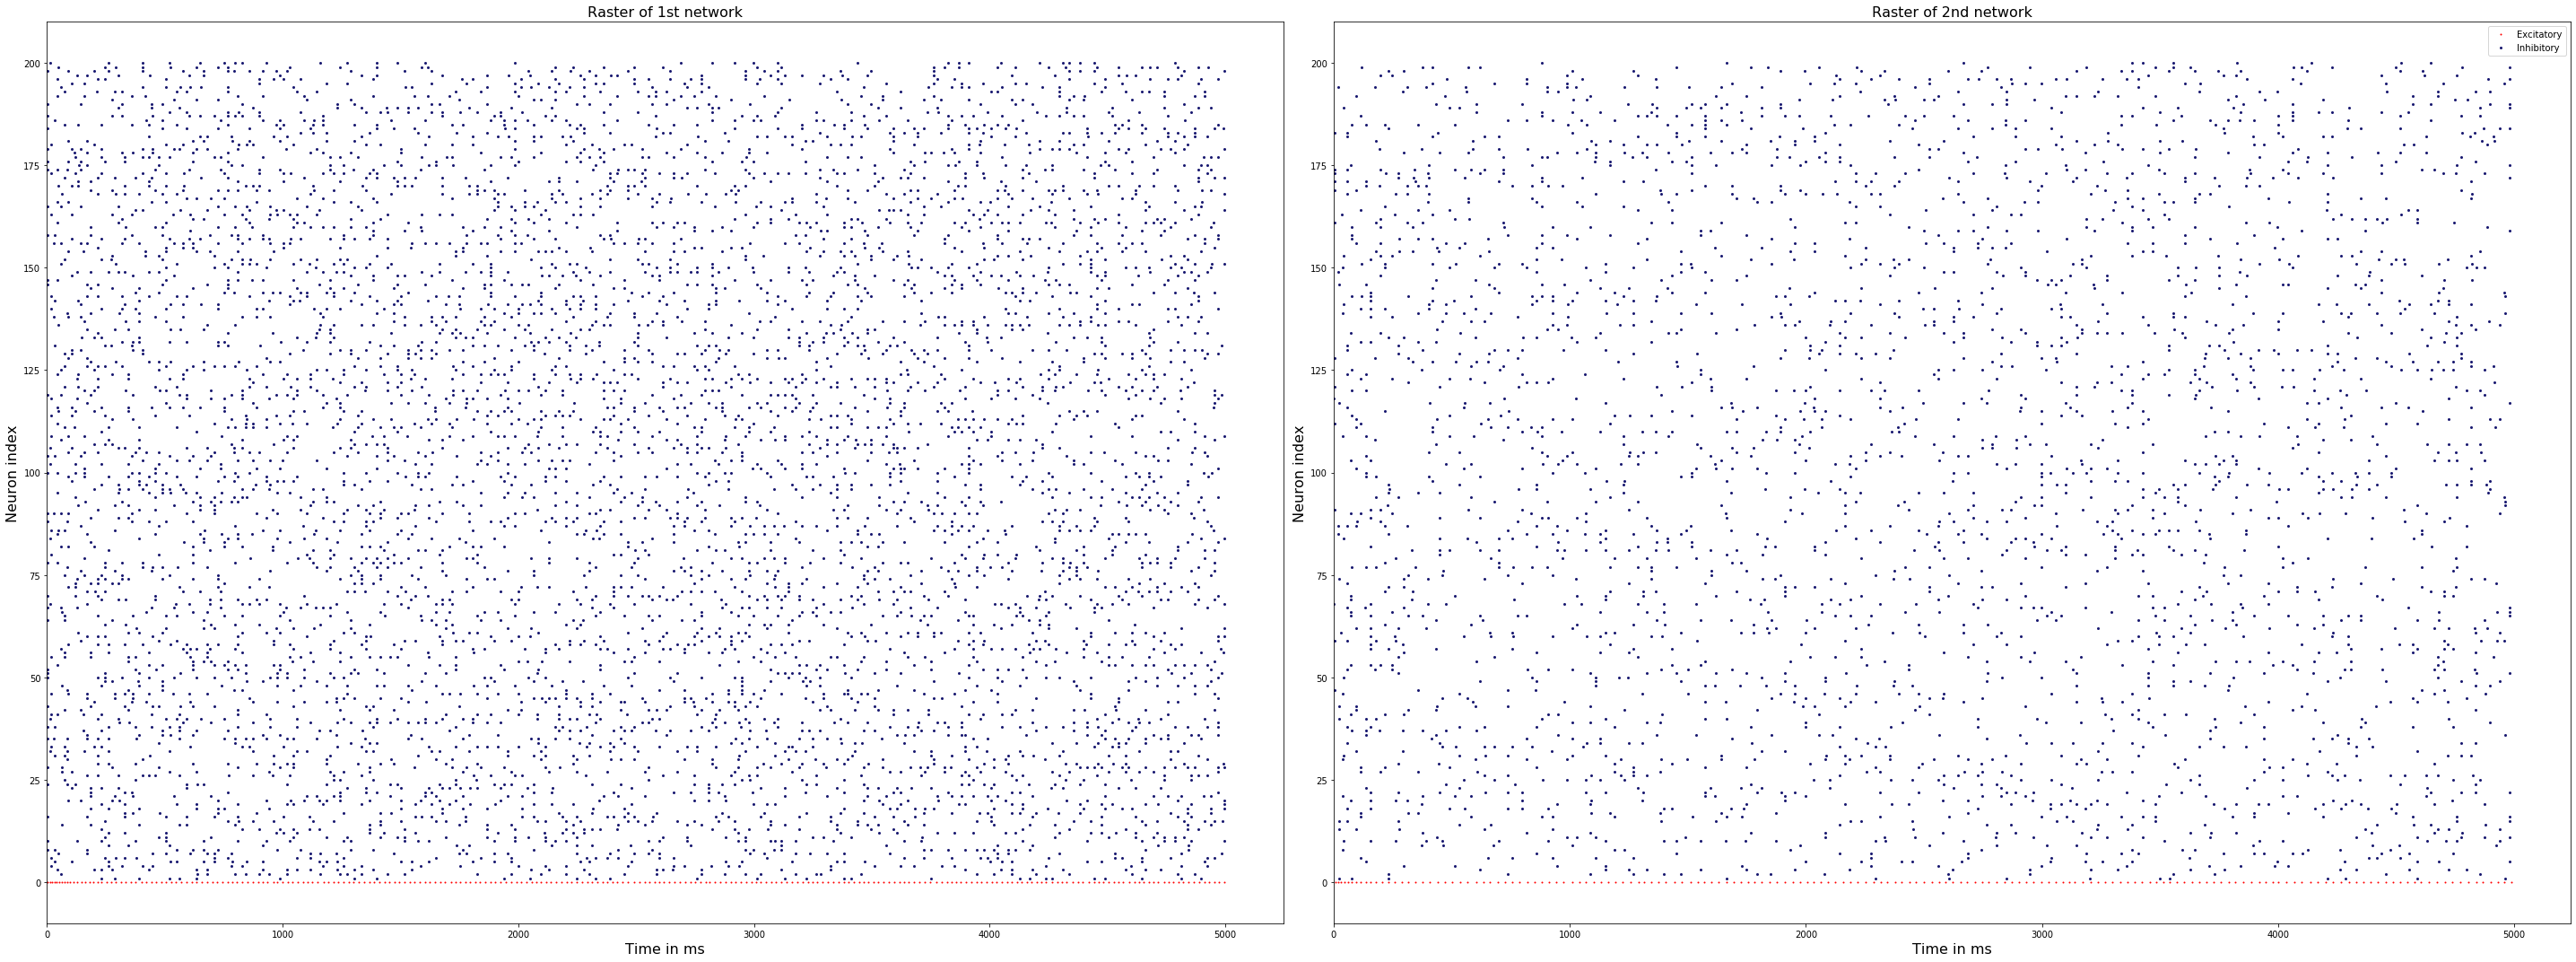

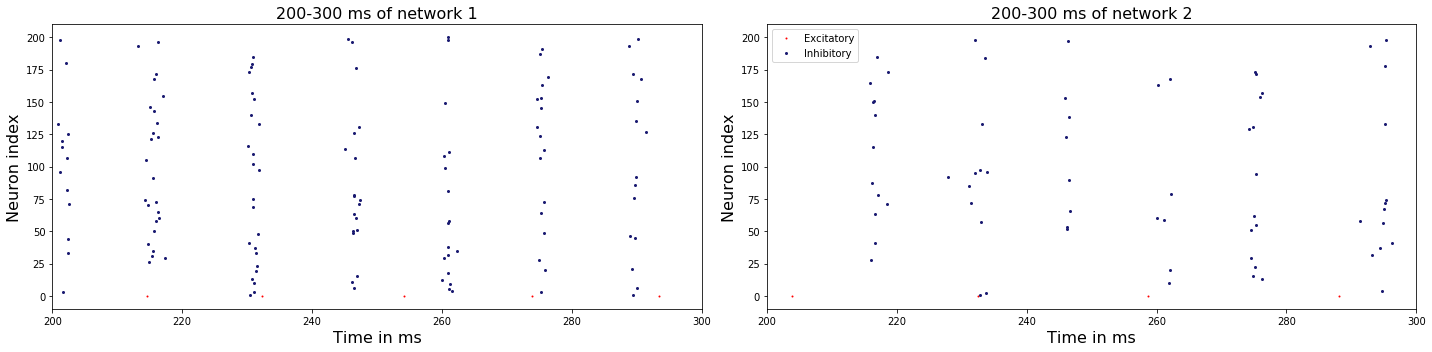

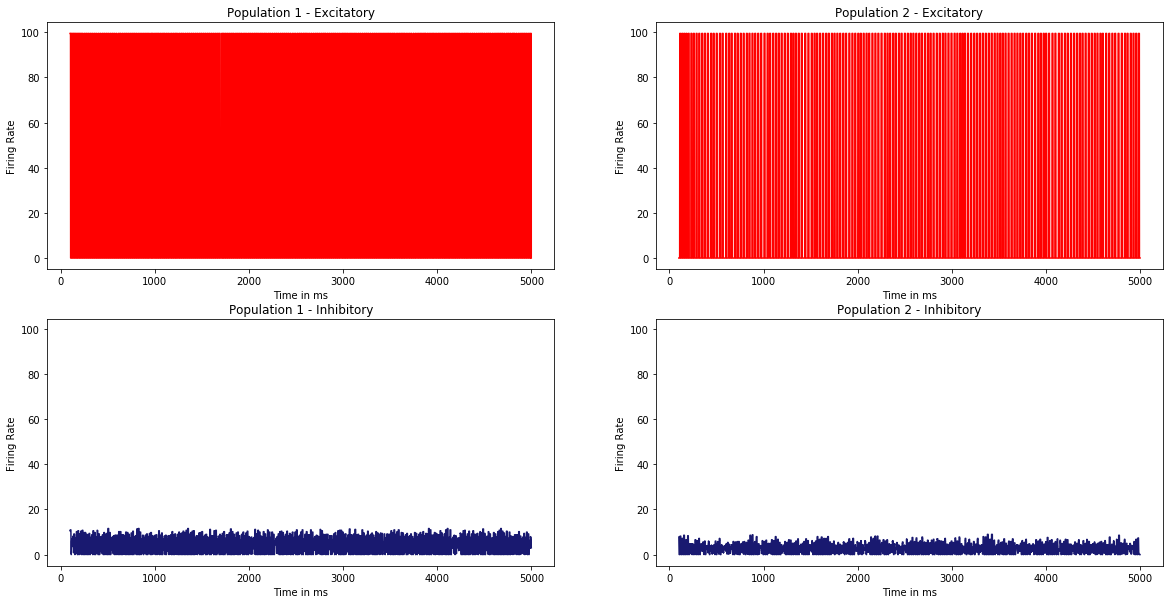

In [93]:
plots.plot_results(model, full_raster=True, psd_group="INH")

## Synchronizing both Networks by increasing network coupling

In [96]:
synch = dict(params)
synch.update({
    "J_ppii": 0.5,
    "runtime": 5000,
})
model = runner.run(
    modified_params=synch
)

Initializing net ...
Net 1 - poisson rate 80000.0 - single neuron 100.0 - strength 0.0025
Poisson rate to I pop: 100.0
Net 2 - rate for single neuron 75.0
Initialization time: 0.3776419162750244s
Starting simulation at t=0. s for a duration of 5. s
1.3977 s (27%) simulated in 10s, estimated 26s remaining.
2.77865 s (55%) simulated in 20s, estimated 16s remaining.
4.14085 s (82%) simulated in 30s, estimated 6s remaining.
5. s (100%) simulated in 36s
runtime: 42.2


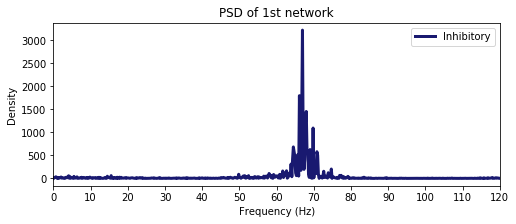

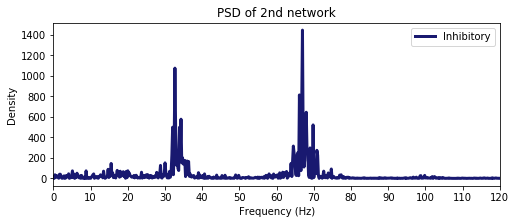

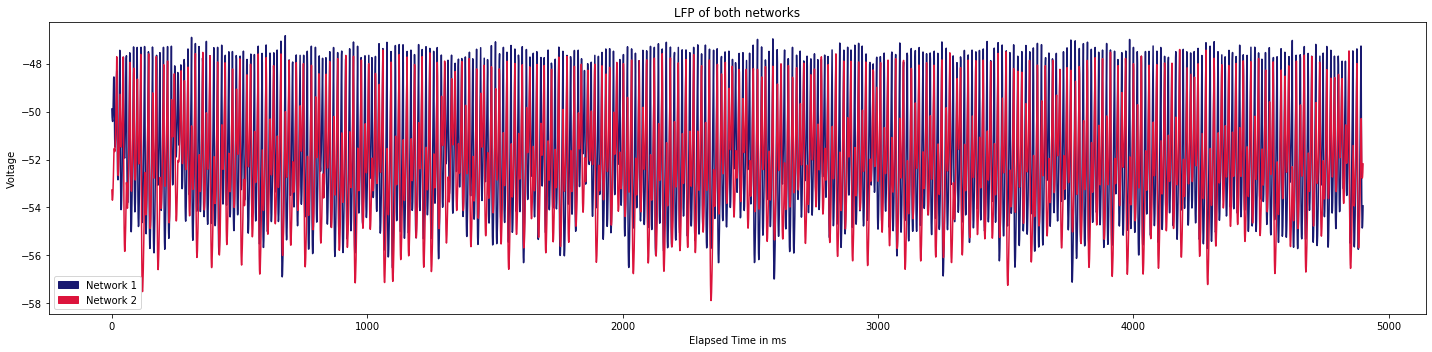

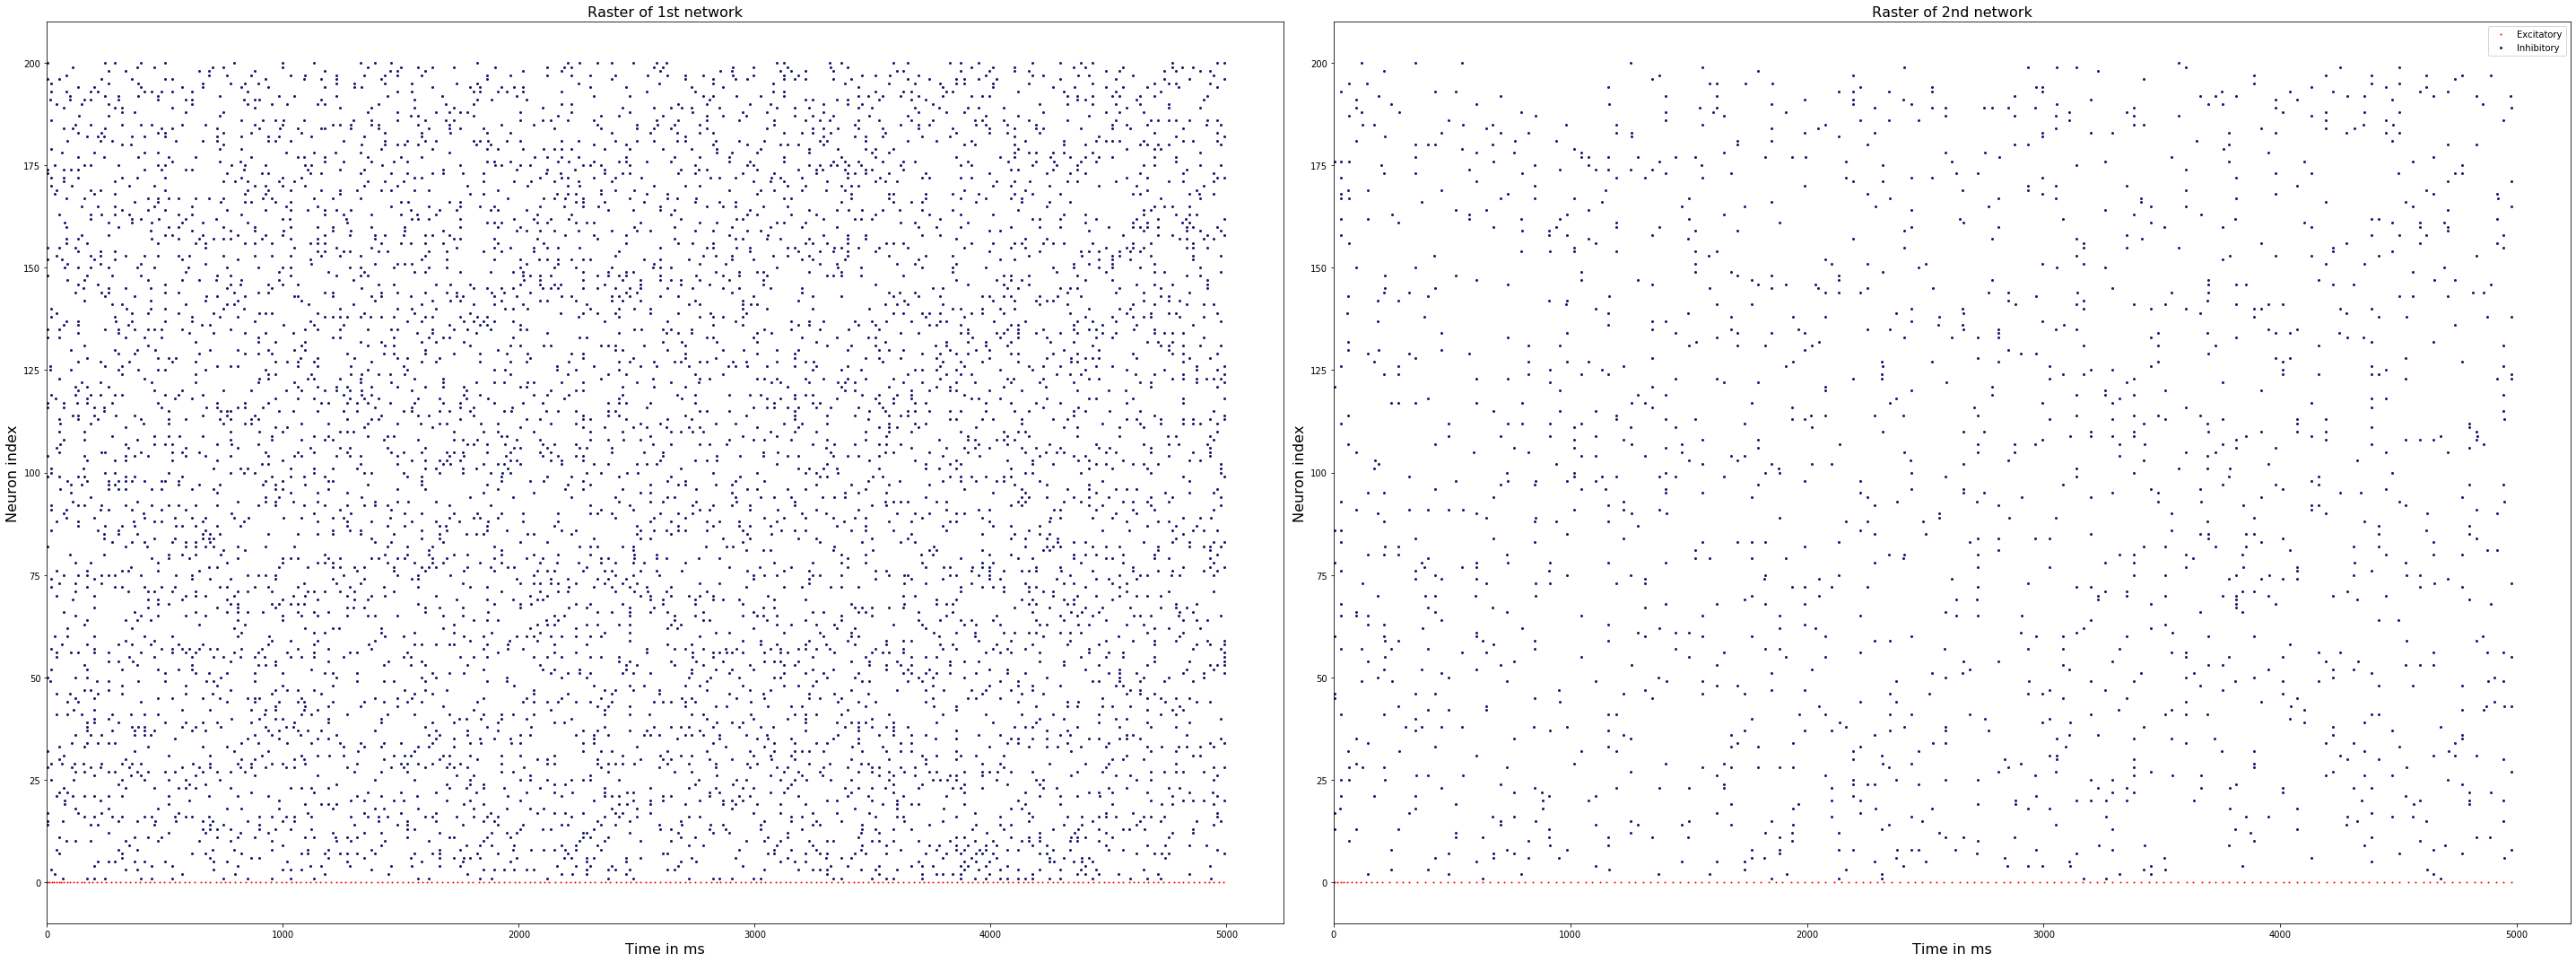

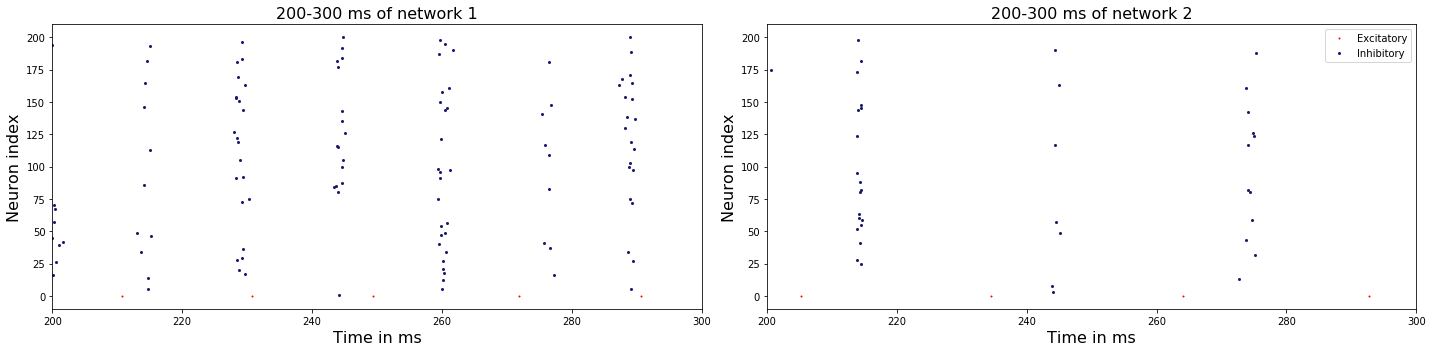

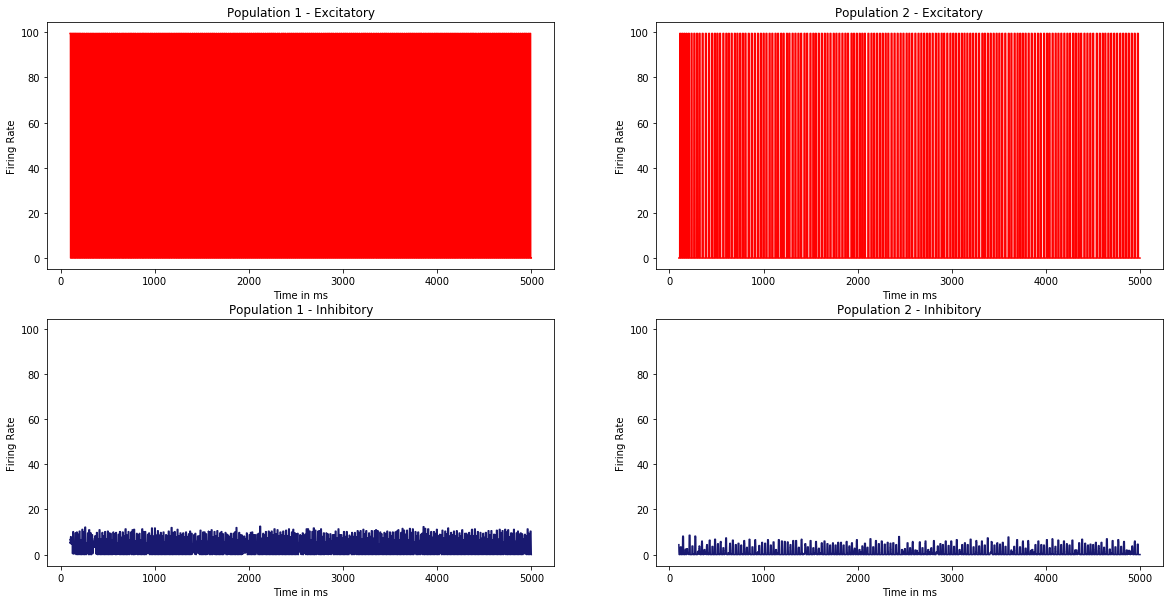

In [97]:
plots.plot_results(model, full_raster=True, psd_group="INH")

## Synchronizing both networks by increasing noise strength

In [102]:
synch = dict(params_mid)
synch["J_ppii"] = 0.2
synch["runtime"] = 5000.0
synch["poisson_variance"] = 1.8
model = runner.run(
    modified_params=synch
)

Initializing net ...
Net 1 - poisson rate 22222.22222222222 - single neuron 27.777777777777775 - strength 0.009000000000000001
Poisson rate to I pop: 27.777777777777775
Net 2 - rate for single neuron 20.833333333333332
Initialization time: 0.3806729316711426s
Starting simulation at t=0. s for a duration of 5. s
1.4414 s (28%) simulated in 10s, estimated 25s remaining.
2.71375 s (54%) simulated in 20s, estimated 17s remaining.
4.0269 s (80%) simulated in 30s, estimated 7s remaining.
5. s (100%) simulated in 37s
runtime: 44.2


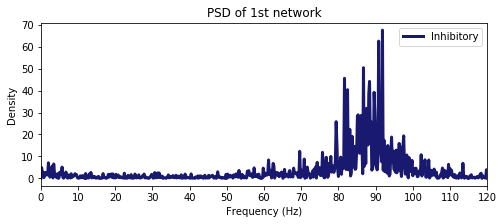

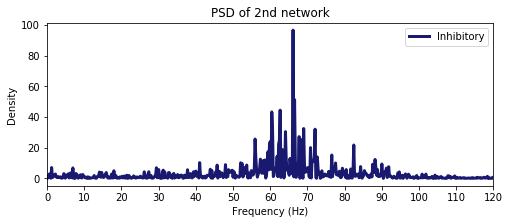

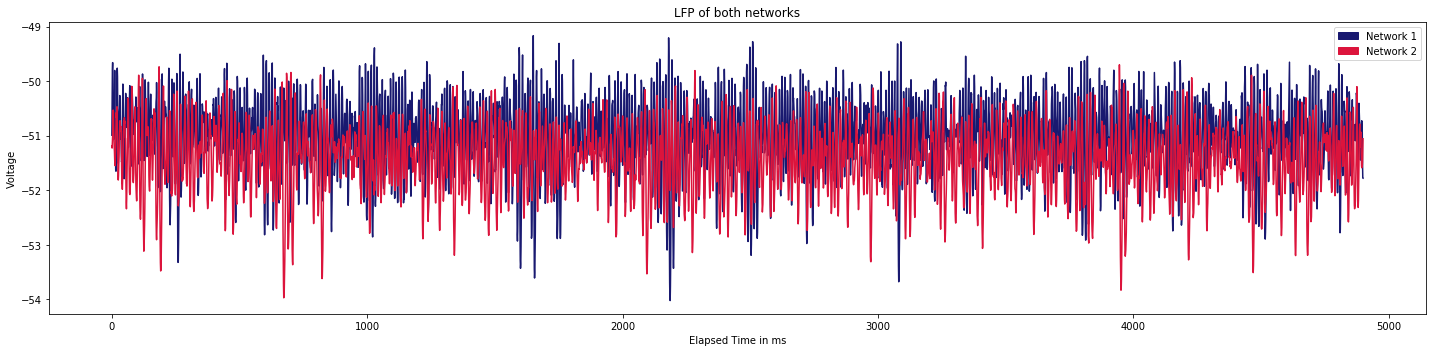

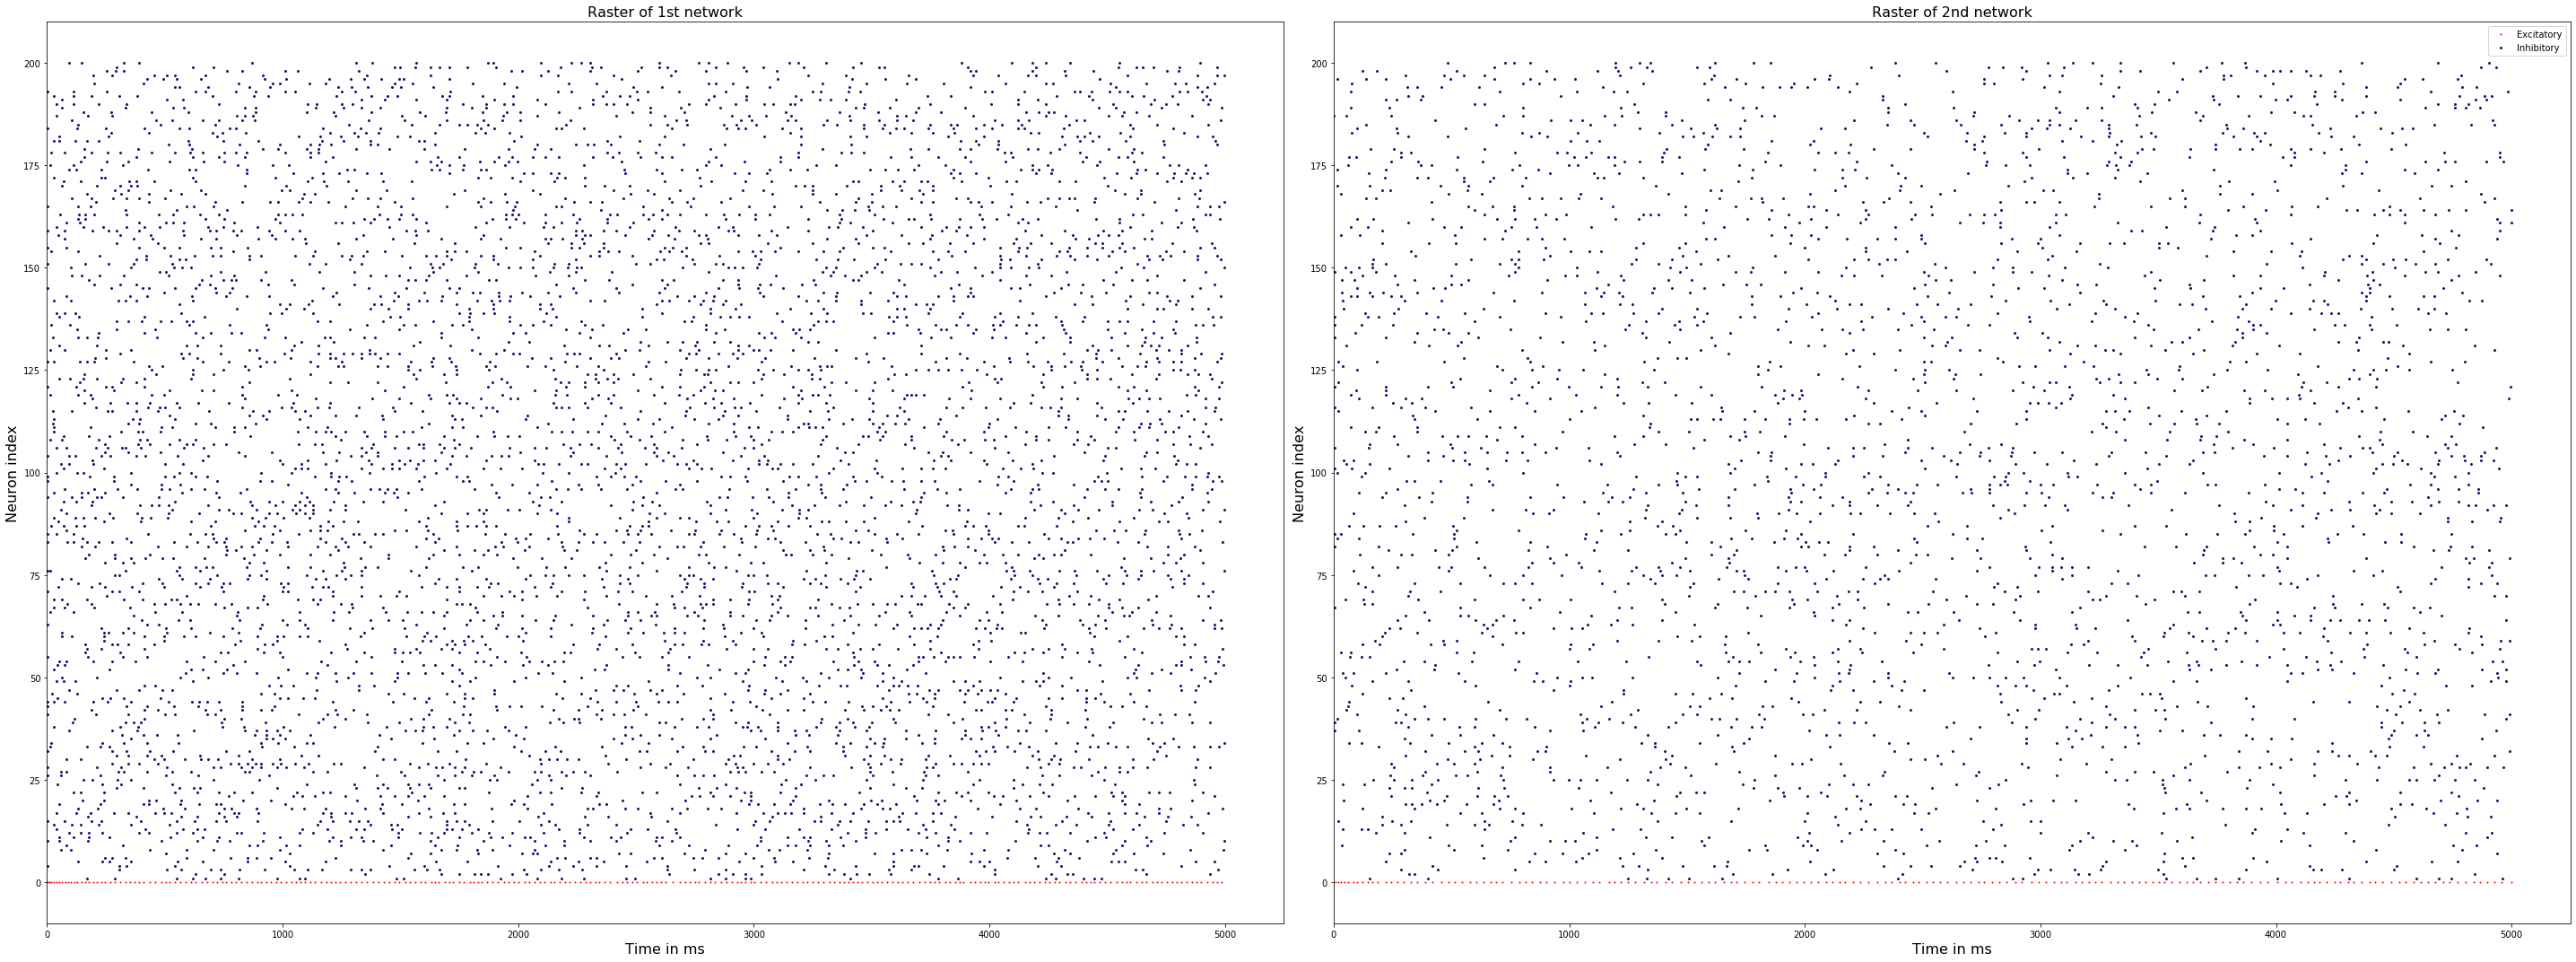

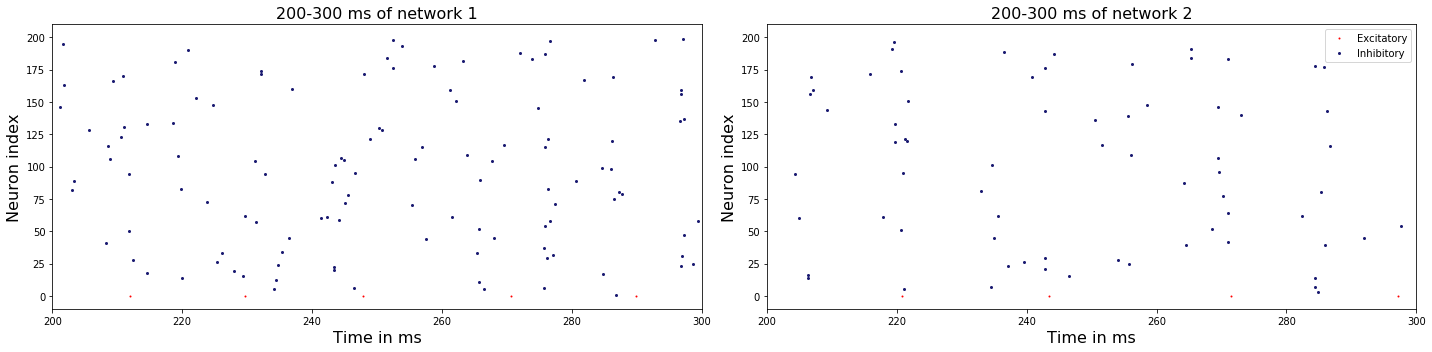

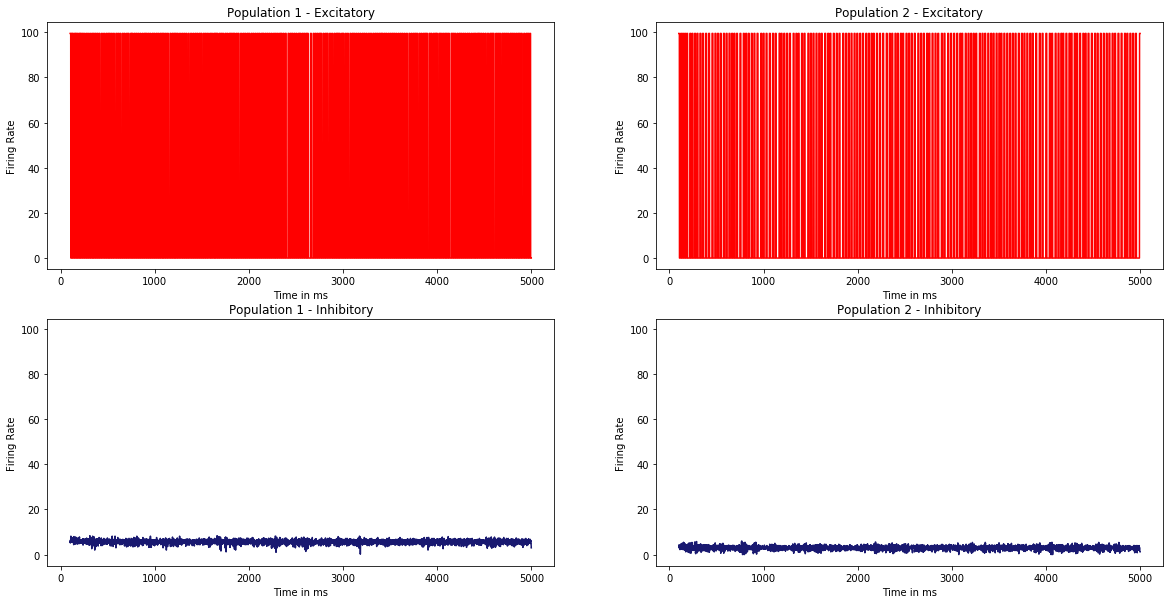

In [103]:
plots.plot_results(model, full_raster=True, psd_group="INH")

# Exploration

In [109]:
exp_params = {
    "poisson_variance": np.arange(0.5, 4.0, 0.1),
}

ov_params = dict(params)
ov_params.update({
    "runtime": 5000.0,
    "J_ppii": 0.2,
})

ex = mopet.Exploration(
    runner.run_in_mopet, 
    explore_params=exp_params, 
    default_params=ov_params,
    hdf_filename=constants.MODELS_PATH + "/ING_synch_noise.h5",
    exploration_name="exp_2"
)

In [110]:
ex.run()

2020-07-16 14:05:01,678	INFO resource_spec.py:212 -- Starting Ray with 9.67 GiB memory available for workers and up to 4.85 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-07-16 14:05:01,916	WARNING services.py:923 -- Redis failed to start, retrying now.
2020-07-16 14:05:02,067	INFO services.py:1165 -- View the Ray dashboard at localhost:8265
INFO:root:Starting 35 jobs.
100%|██████████| 35/35 [00:00<00:00, 775.98it/s]
INFO:root:Runs took 0.048313140869140625 s to submit.
  0%|          | 0/35 [00:00<?, ?it/s]

(pid=10249) Initializing net ...
(pid=10249) Net 1 - poisson rate 30769.230769230773 - single neuron 38.46153846153847 - strength 0.006499999999999999
(pid=10249) Poisson rate to I pop: 38.46153846153847
(pid=10250) Initializing net ...
(pid=10250) Net 1 - poisson rate 33333.33333333334 - single neuron 41.66666666666668 - strength 0.005999999999999998
(pid=10250) Poisson rate to I pop: 41.66666666666668
(pid=10252) Initializing net ...
(pid=10252) Net 1 - poisson rate 36363.63636363637 - single neuron 45.45454545454546 - strength 0.0055
(pid=10252) Poisson rate to I pop: 45.45454545454546
(pid=10257) Initializing net ...
(pid=10257) Net 1 - poisson rate 40000.00000000001 - single neuron 50.00000000000001 - strength 0.004999999999999999
(pid=10257) Poisson rate to I pop: 50.00000000000001
(pid=10254) Initializing net ...
(pid=10254) Net 1 - poisson rate 28571.428571428576 - single neuron 35.71428571428572 - strength 0.006999999999999999
(pid=10254) Poisson rate to I pop: 35.714285714285

  3%|▎         | 1/35 [03:10<1:48:04, 190.73s/it]

(pid=10255) Net 2 - rate for single neuron 14.423076923076925
(pid=10256) Initializing net ...
(pid=10256) Net 1 - poisson rate 14814.81481481482 - single neuron 18.518518518518523 - strength 0.013499999999999996
(pid=10256) Poisson rate to I pop: 18.518518518518523


  6%|▌         | 2/35 [03:11<1:13:30, 133.66s/it]

(pid=10254) Initializing net ...
(pid=10254) Net 1 - poisson rate 14285.714285714288 - single neuron 17.85714285714286 - strength 0.013999999999999997
(pid=10254) Poisson rate to I pop: 17.85714285714286


  9%|▊         | 3/35 [03:11<49:57, 93.68s/it]   

(pid=10256) Net 2 - rate for single neuron 13.888888888888893
(pid=10255) Initialization time: 1.6464500427246094s
(pid=10254) Net 2 - rate for single neuron 13.392857142857146


 14%|█▍        | 5/35 [03:12<23:02, 46.09s/it]

(pid=10256) Initialization time: 1.5122332572937012s


 17%|█▋        | 6/35 [03:12<15:38, 32.37s/it]

(pid=10254) Initialization time: 1.4134621620178223s


 26%|██▌       | 9/35 [03:13<04:54, 11.32s/it]

(pid=10253) Starting simulation at t=0. s for a duration of 5. s


 34%|███▍      | 12/35 [03:14<01:35,  4.14s/it]

(pid=10246) Starting simulation at t=0. s for a duration of 5. s
(pid=10247) Starting simulation at t=0. s for a duration of 5. s
(pid=10252) 0.36605 s (7%) simulated in 10s, estimated 2m 7s remaining.
(pid=10249) Starting simulation at t=0. s for a duration of 5. s
(pid=10257) 0.3693 s (7%) simulated in 10s, estimated 2m 5s remaining.
(pid=10253) 0.38105 s (7%) simulated in 10s, estimated 2m 1s remaining.
(pid=10246) 0.3875 s (7%) simulated in 10s, estimated 1m 59s remaining.
(pid=10248) Starting simulation at t=0. s for a duration of 5. s
(pid=10250) Starting simulation at t=0. s for a duration of 5. s
(pid=10247) 0.38945 s (7%) simulated in 10s, estimated 1m 58s remaining.
(pid=10251) Starting simulation at t=0. s for a duration of 5. s
(pid=10252) 0.7352 s (14%) simulated in 20s, estimated 1m 56s remaining.
(pid=10249) 0.3788 s (7%) simulated in 10s, estimated 2m 2s remaining.
(pid=10255) Starting simulation at t=0. s for a duration of 5. s
(pid=10256) Starting simulation at t=0. s

 37%|███▋      | 13/35 [05:13<14:03, 38.35s/it]

(pid=10252) Initializing net ...
(pid=10252) Net 1 - poisson rate 13793.103448275864 - single neuron 17.24137931034483 - strength 0.014499999999999997
(pid=10252) Poisson rate to I pop: 17.24137931034483
(pid=10253) 4.998 s (99%) simulated in 2m 0s, estimated < 1s remaining.
(pid=10252) Net 2 - rate for single neuron 12.931034482758623
(pid=10253) 5. s (100%) simulated in 2m 0s
(pid=10253) runtime: 138.4
(pid=10247) 5. s (100%) simulated in 1m 56s
(pid=10247) runtime: 135.3
(pid=10252) Initialization time: 1.242264986038208s
(pid=10246) 5. s (100%) simulated in 1m 58s
(pid=10246) runtime: 135.7


 40%|████      | 14/35 [05:14<09:34, 27.37s/it]

(pid=10257) Initializing net ...
(pid=10257) Net 1 - poisson rate 13333.333333333336 - single neuron 16.66666666666667 - strength 0.014999999999999998
(pid=10257) Poisson rate to I pop: 16.66666666666667
(pid=10257) Net 2 - rate for single neuron 12.500000000000004
(pid=10249) 5. s (100%) simulated in 1m 57s
(pid=10249) runtime: 136.3
(pid=10257) Initialization time: 1.1893970966339111s
(pid=10248) 4.7797 s (95%) simulated in 1m 50s, estimated 5s remaining.
(pid=10250) 4.7151 s (94%) simulated in 1m 50s, estimated 7s remaining.
(pid=10251) 4.7656 s (95%) simulated in 1m 50s, estimated 5s remaining.


 43%|████▎     | 15/35 [05:18<06:44, 20.24s/it]

(pid=10253) Initializing net ...
(pid=10253) Net 1 - poisson rate 12903.225806451614 - single neuron 16.129032258064516 - strength 0.015499999999999998
(pid=10253) Poisson rate to I pop: 16.129032258064516
(pid=10253) Net 2 - rate for single neuron 12.096774193548388
(pid=10247) Initializing net ...
(pid=10247) Net 1 - poisson rate 12500.000000000002 - single neuron 15.625000000000002 - strength 0.015999999999999997
(pid=10247) Poisson rate to I pop: 15.625000000000002


 46%|████▌     | 16/35 [05:19<04:34, 14.46s/it]

(pid=10255) 4.7289 s (94%) simulated in 1m 50s, estimated 6s remaining.


 49%|████▊     | 17/35 [05:19<03:03, 10.22s/it]

(pid=10246) Initializing net ...
(pid=10246) Net 1 - poisson rate 12121.212121212124 - single neuron 15.151515151515154 - strength 0.016499999999999997
(pid=10246) Poisson rate to I pop: 15.151515151515154
(pid=10247) Net 2 - rate for single neuron 11.718750000000002
(pid=10253) Initialization time: 1.2563388347625732s
(pid=10256) 4.76735 s (95%) simulated in 1m 50s, estimated 5s remaining.
(pid=10246) Net 2 - rate for single neuron 11.363636363636365
(pid=10254) 4.7018 s (94%) simulated in 1m 50s, estimated 7s remaining.
(pid=10247) Initialization time: 1.273777961730957s
(pid=10246) Initialization time: 1.2784619331359863s


 51%|█████▏    | 18/35 [05:20<02:07,  7.53s/it]

(pid=10249) Initializing net ...
(pid=10249) Net 1 - poisson rate 11764.705882352942 - single neuron 14.705882352941178 - strength 0.016999999999999998
(pid=10249) Poisson rate to I pop: 14.705882352941178
(pid=10249) Net 2 - rate for single neuron 11.029411764705884
(pid=10248) 5. s (100%) simulated in 1m 55s
(pid=10248) runtime: 133.8
(pid=10249) Initialization time: 1.2206711769104004s
(pid=10251) 5. s (100%) simulated in 1m 55s
(pid=10251) runtime: 134.4
(pid=10250) 5. s (100%) simulated in 1m 57s
(pid=10250) runtime: 136.0
(pid=10256) 5. s (100%) simulated in 1m 55s
(pid=10256) runtime: 133.0
(pid=10255) 5. s (100%) simulated in 1m 56s
(pid=10255) runtime: 134.2


 54%|█████▍    | 19/35 [05:26<01:53,  7.09s/it]

(pid=10248) Initializing net ...
(pid=10248) Net 1 - poisson rate 11428.571428571431 - single neuron 14.285714285714288 - strength 0.017499999999999995
(pid=10248) Poisson rate to I pop: 14.285714285714288
(pid=10248) Net 2 - rate for single neuron 10.714285714285715
(pid=10254) 5. s (100%) simulated in 1m 57s
(pid=10254) runtime: 135.1
(pid=10248) Initialization time: 1.3024461269378662s
(pid=10251) Initializing net ...
(pid=10251) Net 1 - poisson rate 11111.111111111115 - single neuron 13.888888888888893 - strength 0.017999999999999995
(pid=10251) Poisson rate to I pop: 13.888888888888893
(pid=10251) Net 2 - rate for single neuron 10.41666666666667


 60%|██████    | 21/35 [05:29<00:56,  4.06s/it]

(pid=10250) Initializing net ...
(pid=10250) Net 1 - poisson rate 10810.810810810814 - single neuron 13.513513513513518 - strength 0.018499999999999996
(pid=10250) Poisson rate to I pop: 13.513513513513518
(pid=10251) Initialization time: 1.303480863571167s
(pid=10250) Net 2 - rate for single neuron 10.135135135135139
(pid=10256) Initializing net ...
(pid=10256) Net 1 - poisson rate 10526.315789473687 - single neuron 13.157894736842108 - strength 0.018999999999999996
(pid=10256) Poisson rate to I pop: 13.157894736842108
(pid=10250) Initialization time: 1.2918059825897217s


 63%|██████▎   | 22/35 [05:31<00:42,  3.29s/it]

(pid=10256) Net 2 - rate for single neuron 9.86842105263158
(pid=10252) Starting simulation at t=0. s for a duration of 5. s
(pid=10255) Initializing net ...
(pid=10255) Net 1 - poisson rate 10256.410256410258 - single neuron 12.820512820512823 - strength 0.019499999999999997
(pid=10255) Poisson rate to I pop: 12.820512820512823


 66%|██████▌   | 23/35 [05:31<00:28,  2.41s/it]

(pid=10255) Net 2 - rate for single neuron 9.615384615384617
(pid=10256) Initialization time: 1.3008241653442383s
(pid=10255) Initialization time: 1.3768811225891113s


 69%|██████▊   | 24/35 [05:33<00:23,  2.16s/it]

(pid=10257) Starting simulation at t=0. s for a duration of 5. s
(pid=10253) Starting simulation at t=0. s for a duration of 5. s
(pid=10247) Starting simulation at t=0. s for a duration of 5. s
(pid=10246) Starting simulation at t=0. s for a duration of 5. s
(pid=10249) Starting simulation at t=0. s for a duration of 5. s
(pid=10252) 0.3988 s (7%) simulated in 10s, estimated 1m 55s remaining.
(pid=10257) 0.40045 s (8%) simulated in 10s, estimated 1m 55s remaining.
(pid=10248) Starting simulation at t=0. s for a duration of 5. s
(pid=10251) Starting simulation at t=0. s for a duration of 5. s
(pid=10253) 0.40065 s (8%) simulated in 10s, estimated 1m 55s remaining.
(pid=10250) Starting simulation at t=0. s for a duration of 5. s
(pid=10247) 0.4047 s (8%) simulated in 10s, estimated 1m 54s remaining.
(pid=10246) 0.4035 s (8%) simulated in 10s, estimated 1m 54s remaining.
(pid=10256) Starting simulation at t=0. s for a duration of 5. s
(pid=10249) 0.40395 s (8%) simulated in 10s, estimate

 71%|███████▏  | 25/35 [08:07<07:58, 47.84s/it]

(pid=10250) 4.5234 s (90%) simulated in 2m 20s, estimated 15s remaining.
(pid=10247) 4.9529 s (99%) simulated in 2m 30s, estimated 1s remaining.
(pid=10246) 4.90785 s (98%) simulated in 2m 30s, estimated 3s remaining.
(pid=10256) 4.54595 s (90%) simulated in 2m 20s, estimated 14s remaining.
(pid=10247) 5. s (100%) simulated in 2m 31s
(pid=10247) runtime: 169.0
(pid=10249) 4.90275 s (98%) simulated in 2m 30s, estimated 3s remaining.
(pid=10253) 5. s (100%) simulated in 2m 33s
(pid=10253) runtime: 170.2
(pid=10255) 4.51145 s (90%) simulated in 2m 20s, estimated 15s remaining.
(pid=10246) 5. s (100%) simulated in 2m 32s
(pid=10246) runtime: 170.1


 74%|███████▍  | 26/35 [08:11<05:13, 34.79s/it]

(pid=10249) 5. s (100%) simulated in 2m 32s
(pid=10249) runtime: 170.1


 83%|████████▎ | 29/35 [08:15<01:15, 12.59s/it]

(pid=10248) 4.9621 s (99%) simulated in 2m 30s, estimated 1s remaining.
(pid=10248) 5. s (100%) simulated in 2m 30s
(pid=10248) runtime: 167.9


 86%|████████▌ | 30/35 [08:16<00:45,  9.11s/it]

(pid=10251) 4.99375 s (99%) simulated in 2m 30s, estimated < 1s remaining.
(pid=10251) 5. s (100%) simulated in 2m 30s
(pid=10251) runtime: 166.8
(pid=10250) 4.98895 s (99%) simulated in 2m 30s, estimated < 1s remaining.
(pid=10250) 5. s (100%) simulated in 2m 30s
(pid=10250) runtime: 167.3
(pid=10256) 5. s (100%) simulated in 2m 29s
(pid=10256) runtime: 166.5


 89%|████████▊ | 31/35 [08:19<00:28,  7.24s/it]

(pid=10255) 5. s (100%) simulated in 2m 29s
(pid=10255) runtime: 166.7


100%|██████████| 35/35 [08:22<00:00, 14.36s/it]
INFO:root:Runs and storage took 502.49719500541687 s to complete.


In [111]:
ex.load_results(all=True)

INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise.h5 opened for reading.
INFO:root:Gettings runs of exploration ``exp_2``
100%|██████████| 35/35 [00:04<00:00,  7.72it/s]
INFO:root:Creating new results DataFrame
INFO:root:Aggregating scalar results ...
100%|██████████| 35/35 [00:04<00:00,  8.53it/s]
INFO:root:/Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/models/ING_synch_noise.h5 closed.


{'J_etoe': 0.0,
 'J_etoi': 0.0,
 'J_itoe': 0.0,
 'J_itoi': 1.0,
 'J_ppee': 0.0,
 'J_ppei': 0.0,
 'J_ppii': 0.2,
 'N_e': 1,
 'N_i': 500,
 'N_pop': 2,
 'model_EI': False,
 'net_record_spikes': 200,
 'ou_enabled': [False, False],
 'p_etoe': 0,
 'p_etoi': 0.0,
 'p_itoe': 0.0,
 'p_itoi': 1.0,
 'p_ppee': 0.0,
 'p_ppei': 0.0,
 'p_ppii': 1.0,
 'poisson_I_enabled': True,
 'poisson_I_ratio': 1.0,
 'poisson_enabled': [True, True],
 'poisson_mean_input': 200,
 'poisson_p': 0.75,
 'poisson_size': 800,
 'poisson_variance': 0.5,
 'runtime': 5000.0,
 'syn_net_exc': False,
 'syn_net_inh': True,
 'tau_GABA': 9.0}


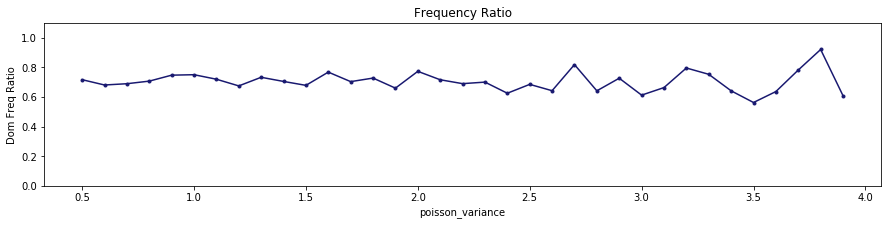

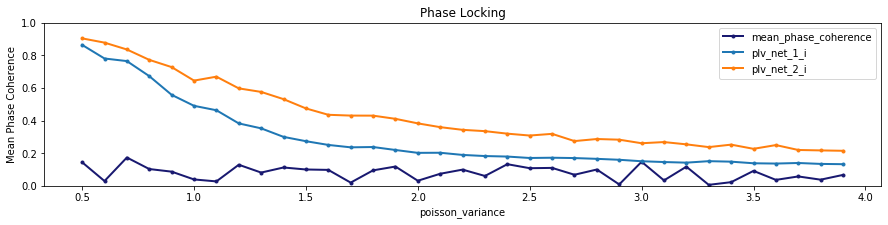

In [112]:
import pprint

plots.plot_exploration(ex, vmin_ratio=None, vmin_phase=None, vmax_phase=None)
pprint.pprint(ex.default_params)

## Coupling Strength Exp

In [7]:
models = []
values = [0.1, 1, 2, 5, 10, 20]

for x in values:
    params_mid["J_itoi"] = x
    m = runner.run(
        modified_params=params_mid
    )
    models.append(m)

Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.6223320960998535s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


runtime: 17.8
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5154402256011963s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
runtime: 10.3
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5864319801330566s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 4s
runtime: 10.4
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Net 2 - rate for single neuron 43.75
Initialization time: 0.5321500301361084s
Starting simulation at t=0. s for a duration of 0.5 s
0.5 s (100%) simulated in 3s
runtime: 9.9
Initializing net ...
Net 1 - poisson rate 50000.0 - single neuron 62.5 - strength 0.01
Poisson rate to I pop: 62.5
Ne

----- J_itoi: 0.1 ----- 
----- J_itoi: 1 ----- 
----- J_itoi: 2 ----- 


WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:629: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(20, 5))
 [py.warnings]
  fig = plt.figure(figsize=(20, 5))

WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:283: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(40, 15))
 [py.warnings]
  fig, axs = plt.subplots(1, 2, figsize=(40, 15))



----- J_itoi: 5 ----- 


WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:302: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))
 [py.warnings]
  fig, axs = plt.subplots(1, 2, figsize=(20, 5))

WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:655: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey="col")
 [py.warnings]
  fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey="col")

WARN

----- J_itoi: 10 ----- 
----- J_itoi: 20 ----- 


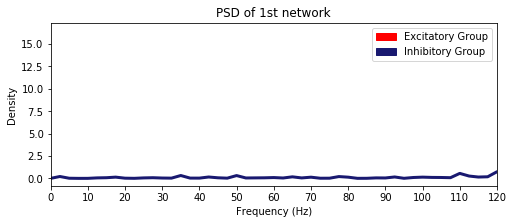

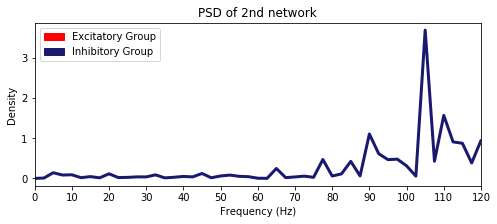

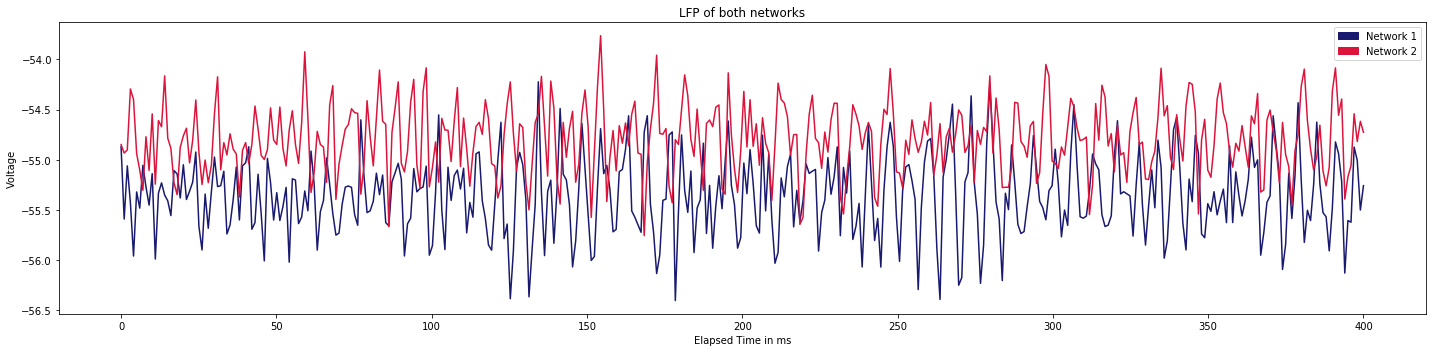

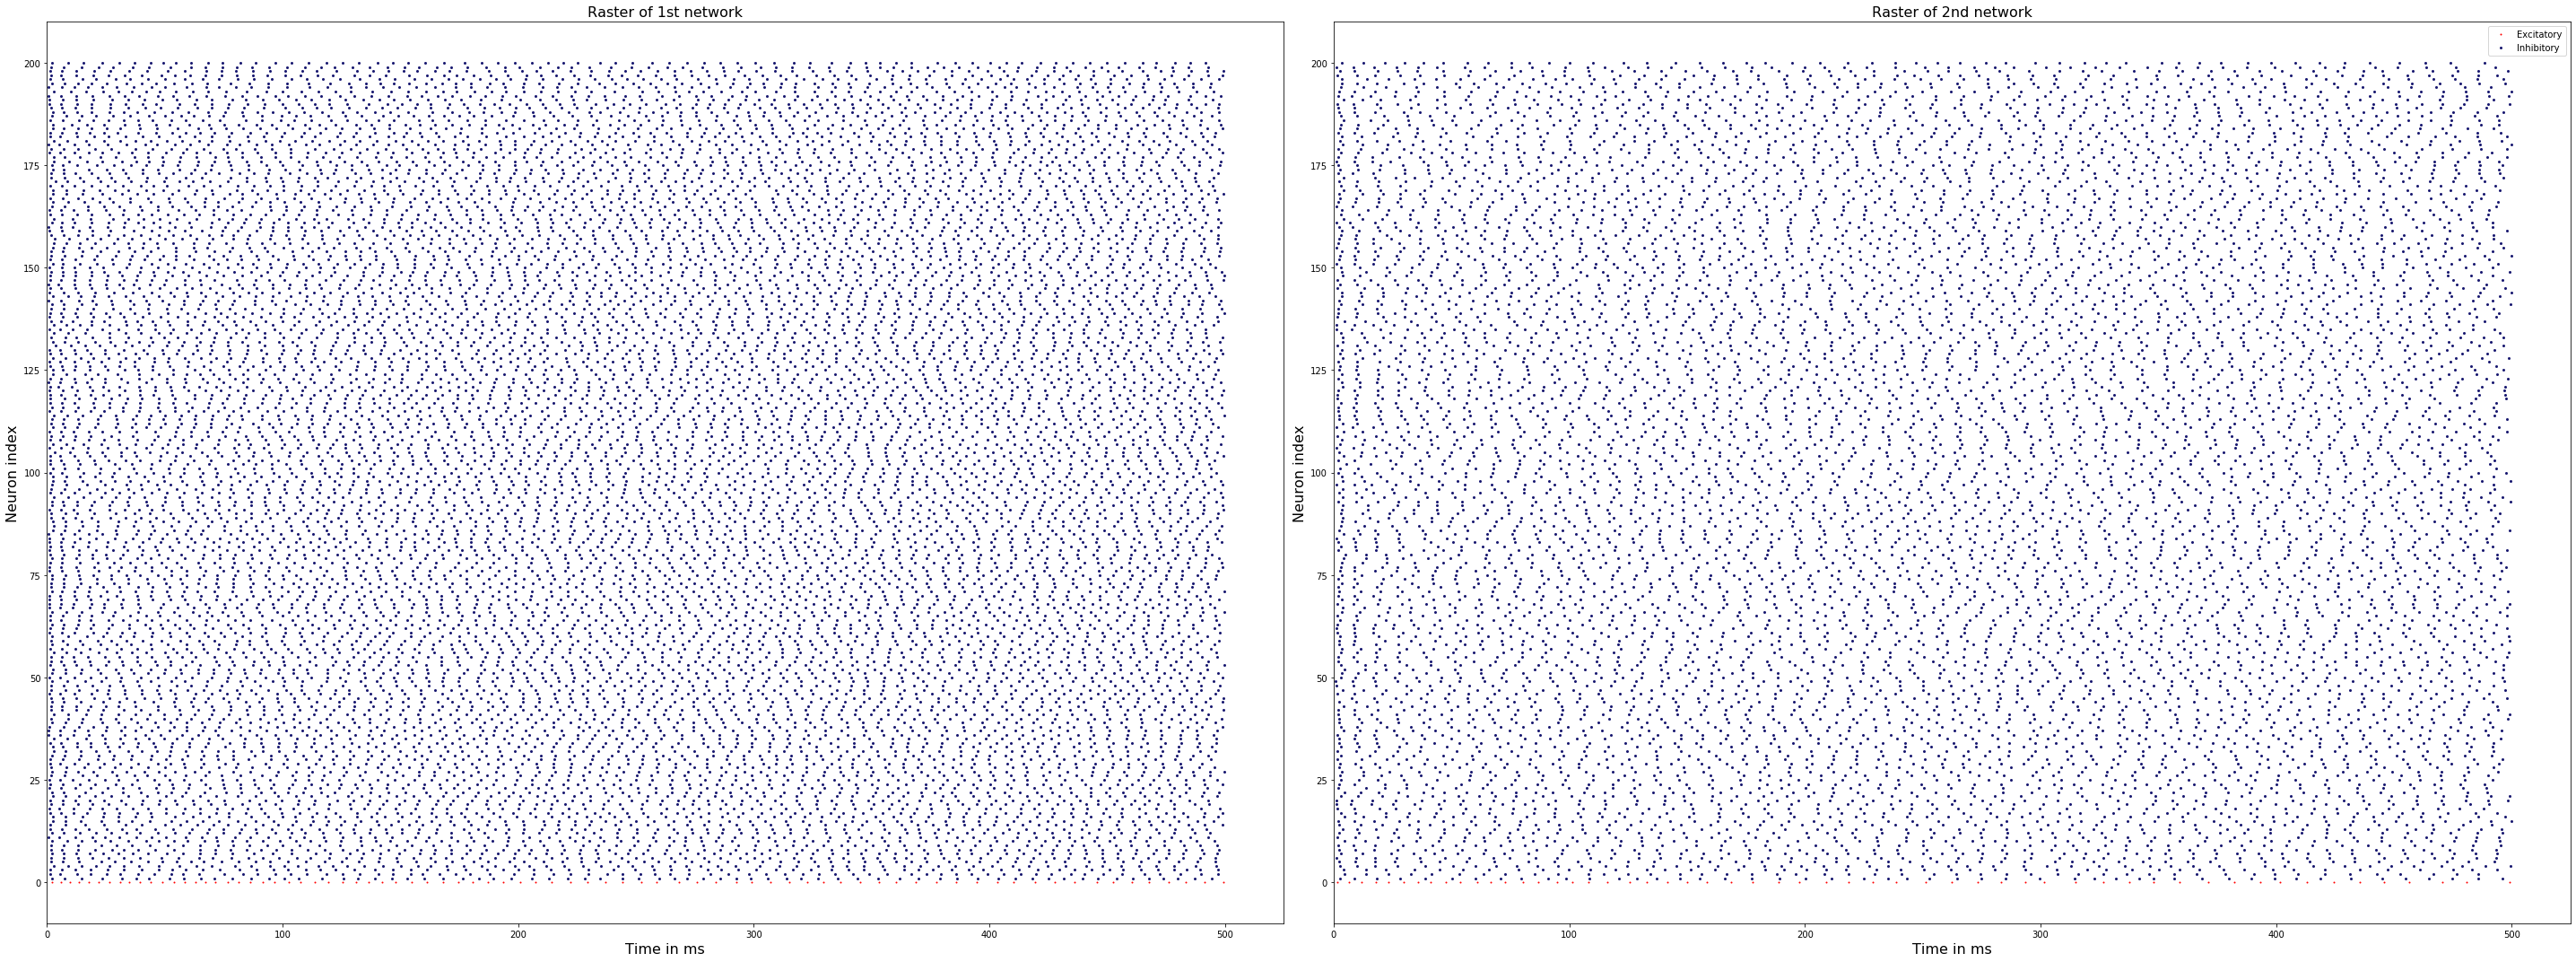

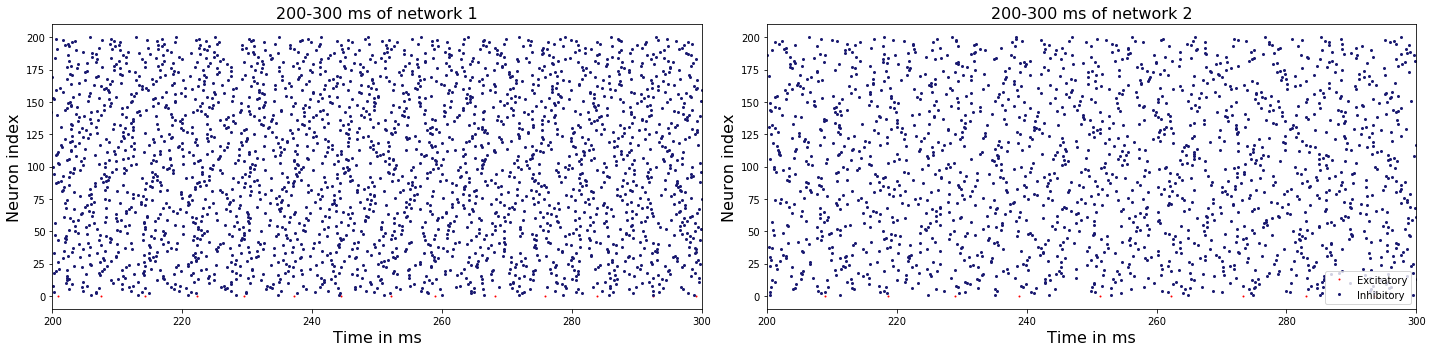

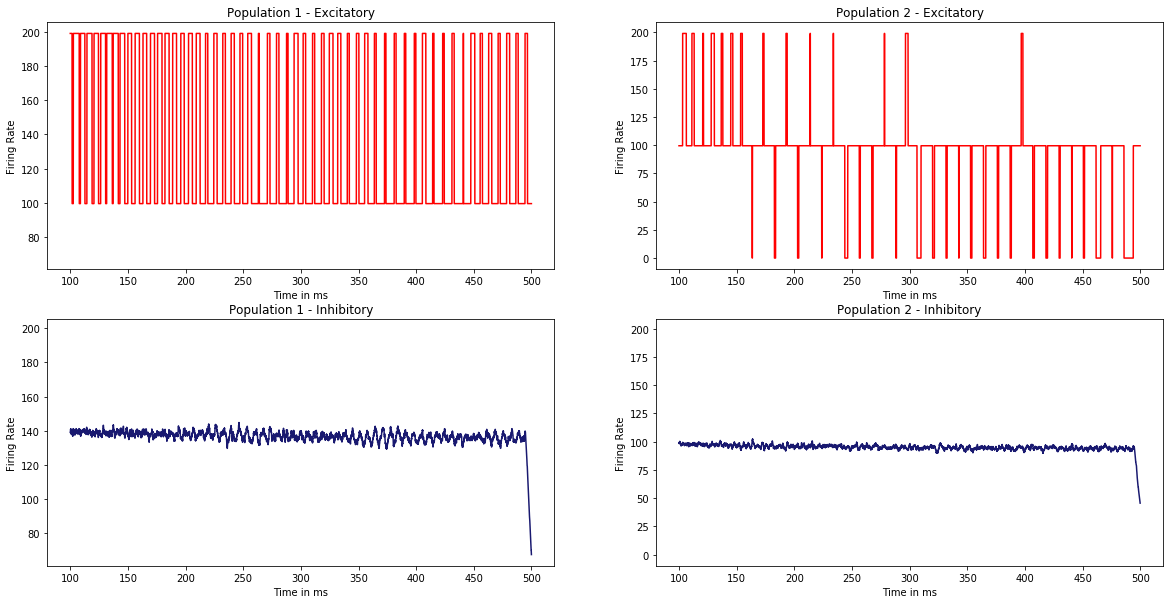

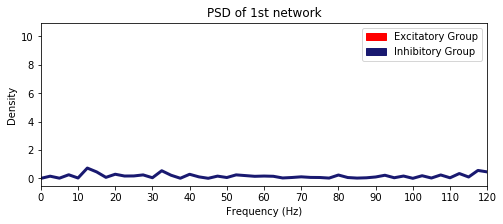

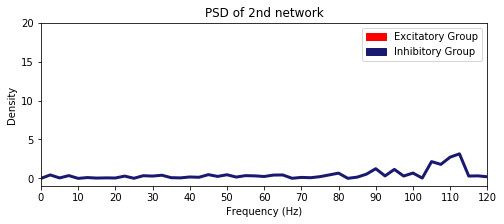

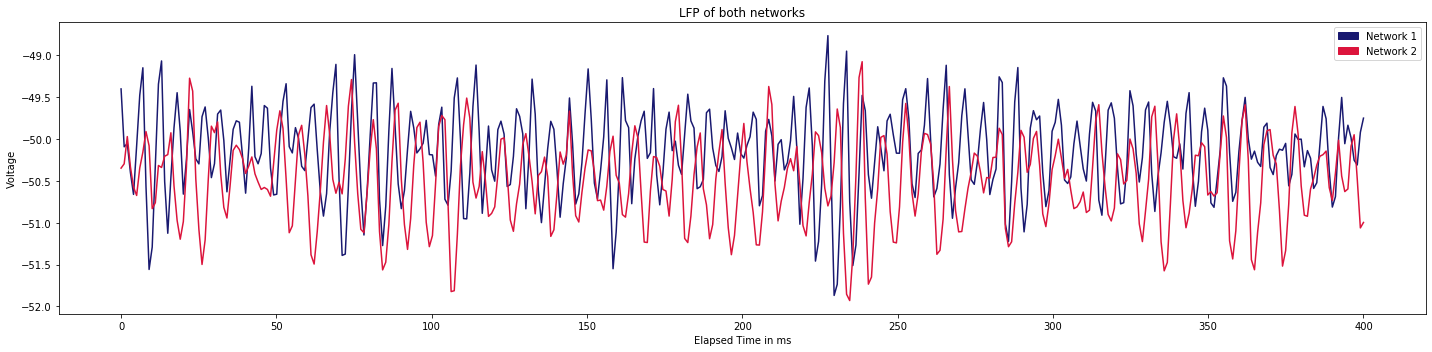

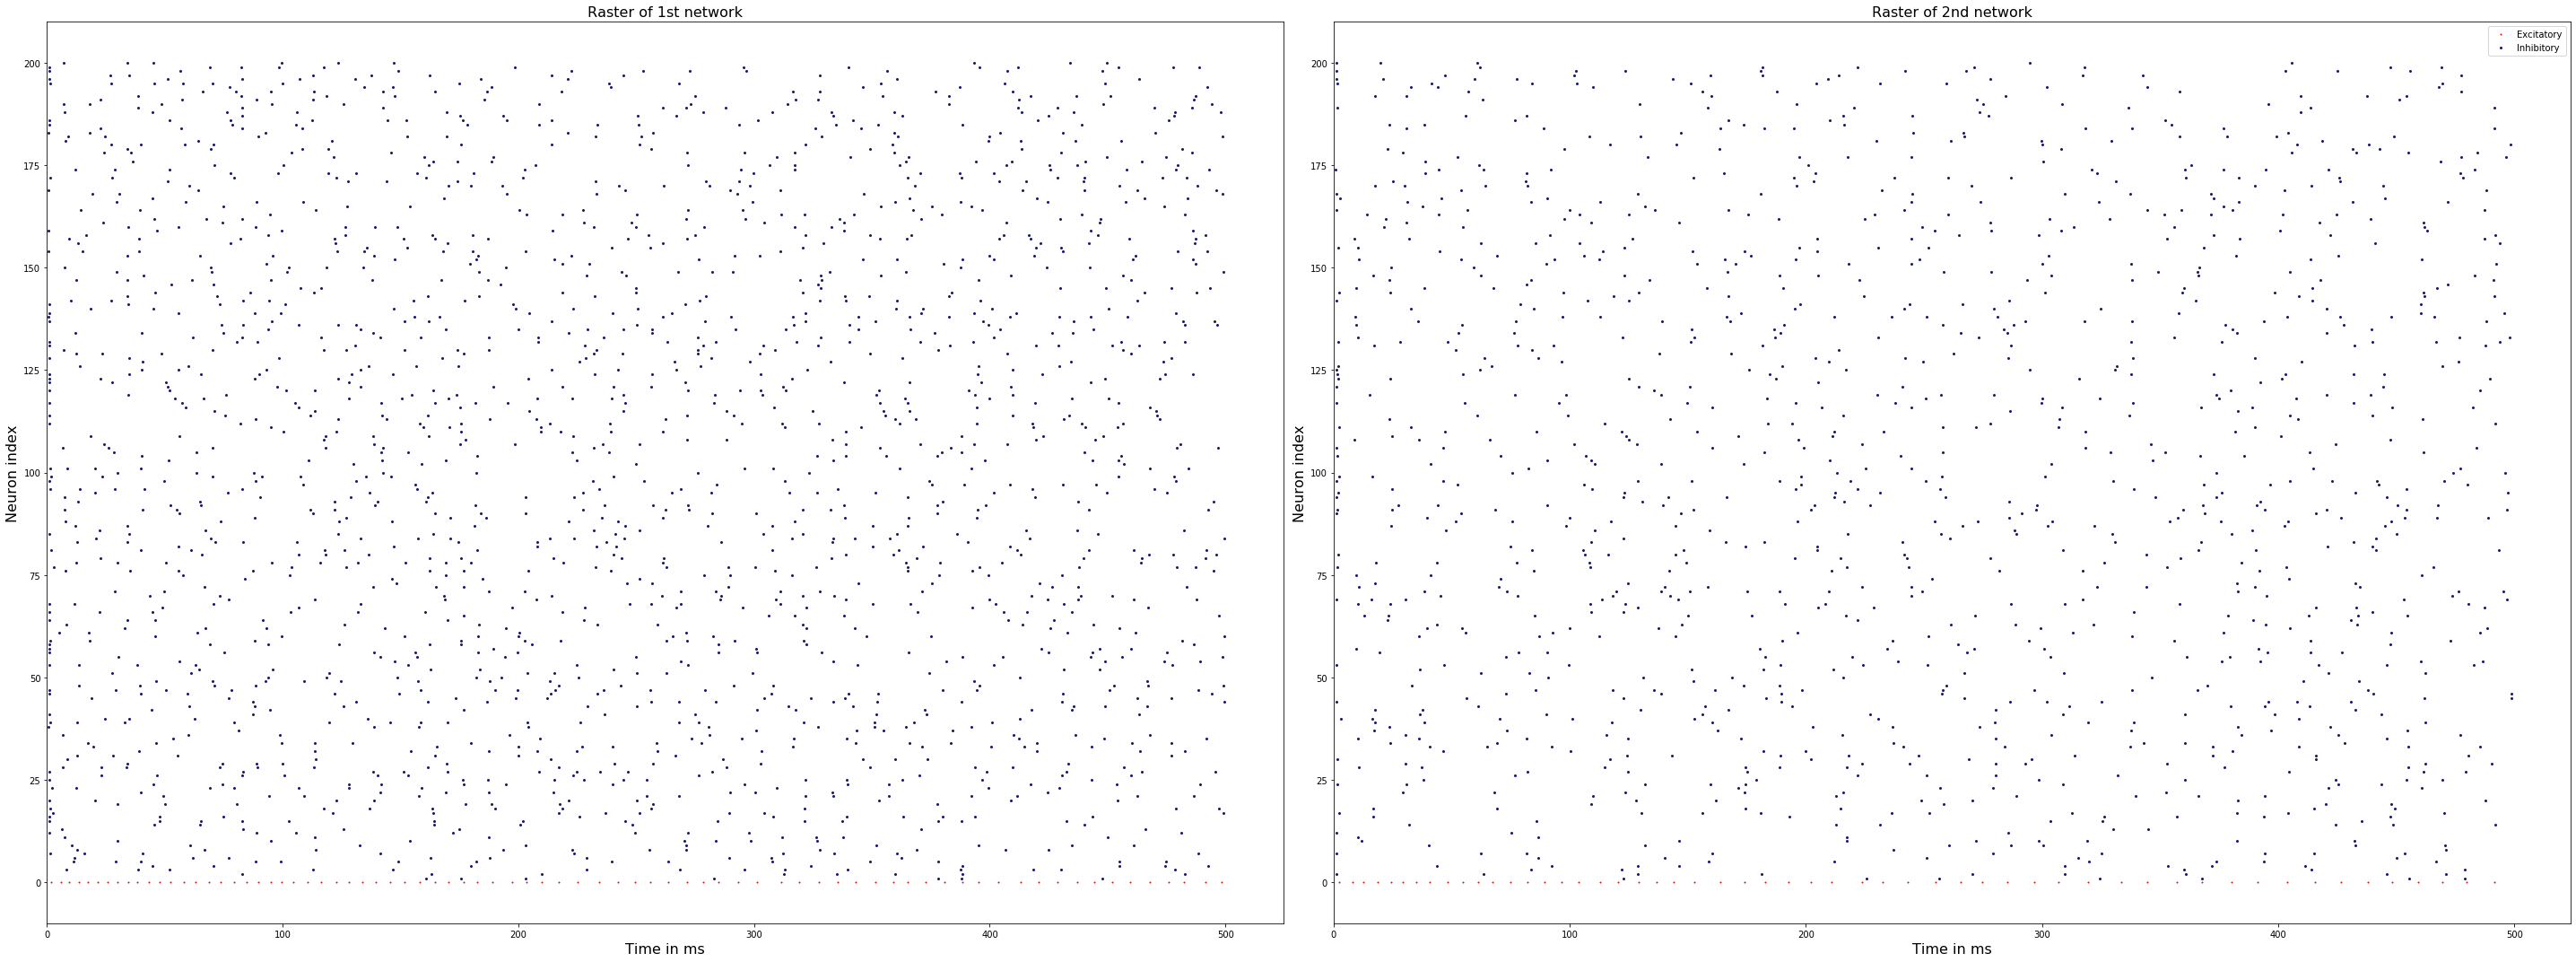

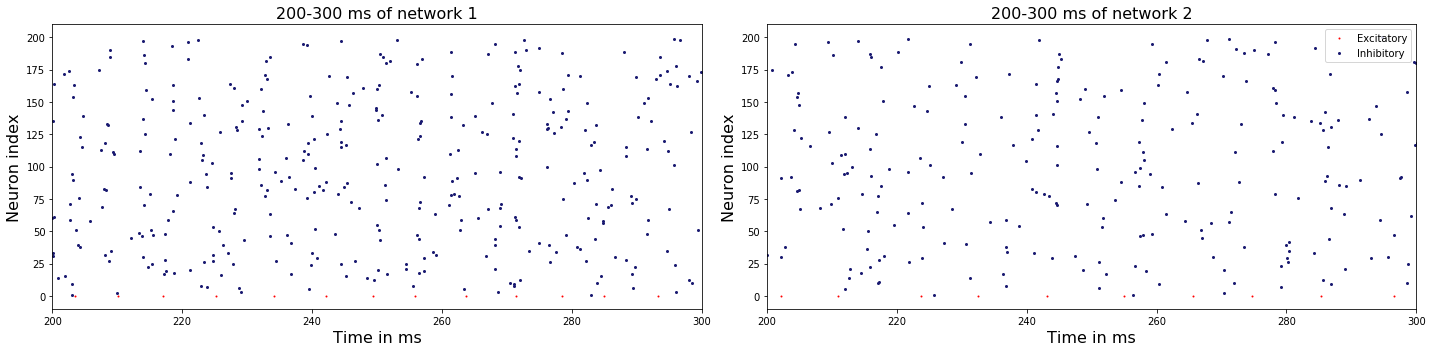

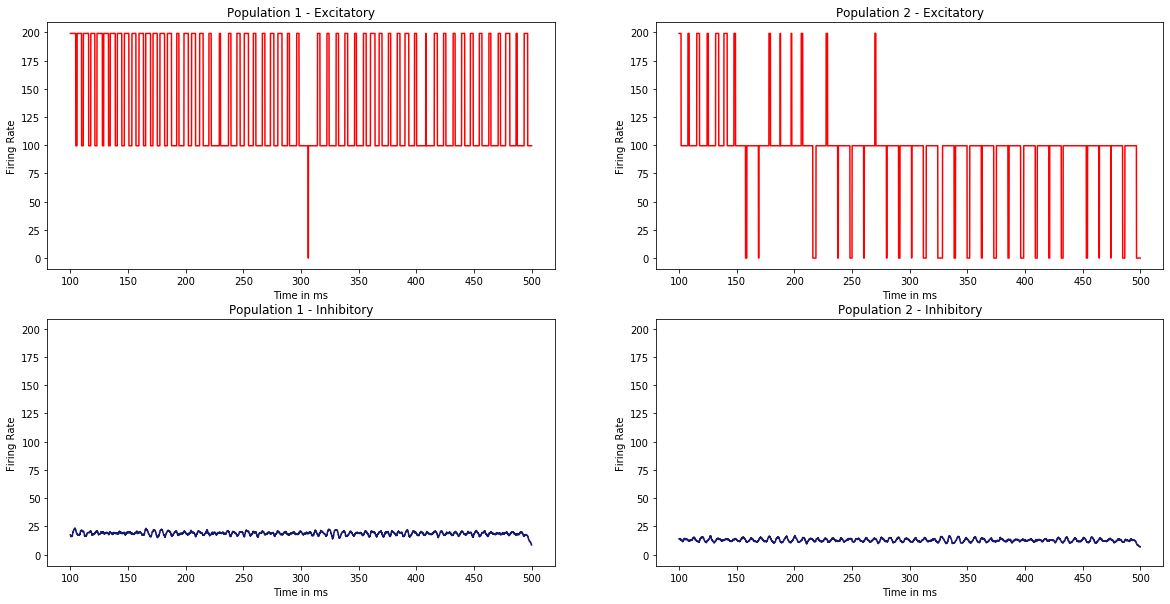

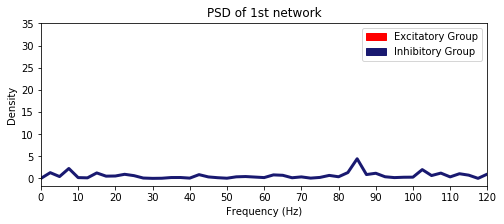

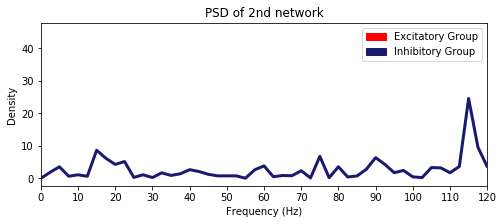

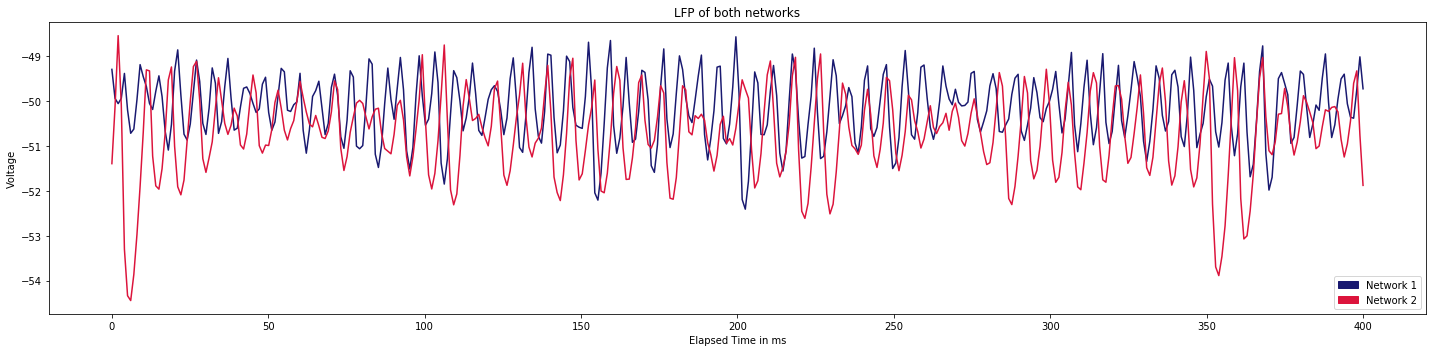

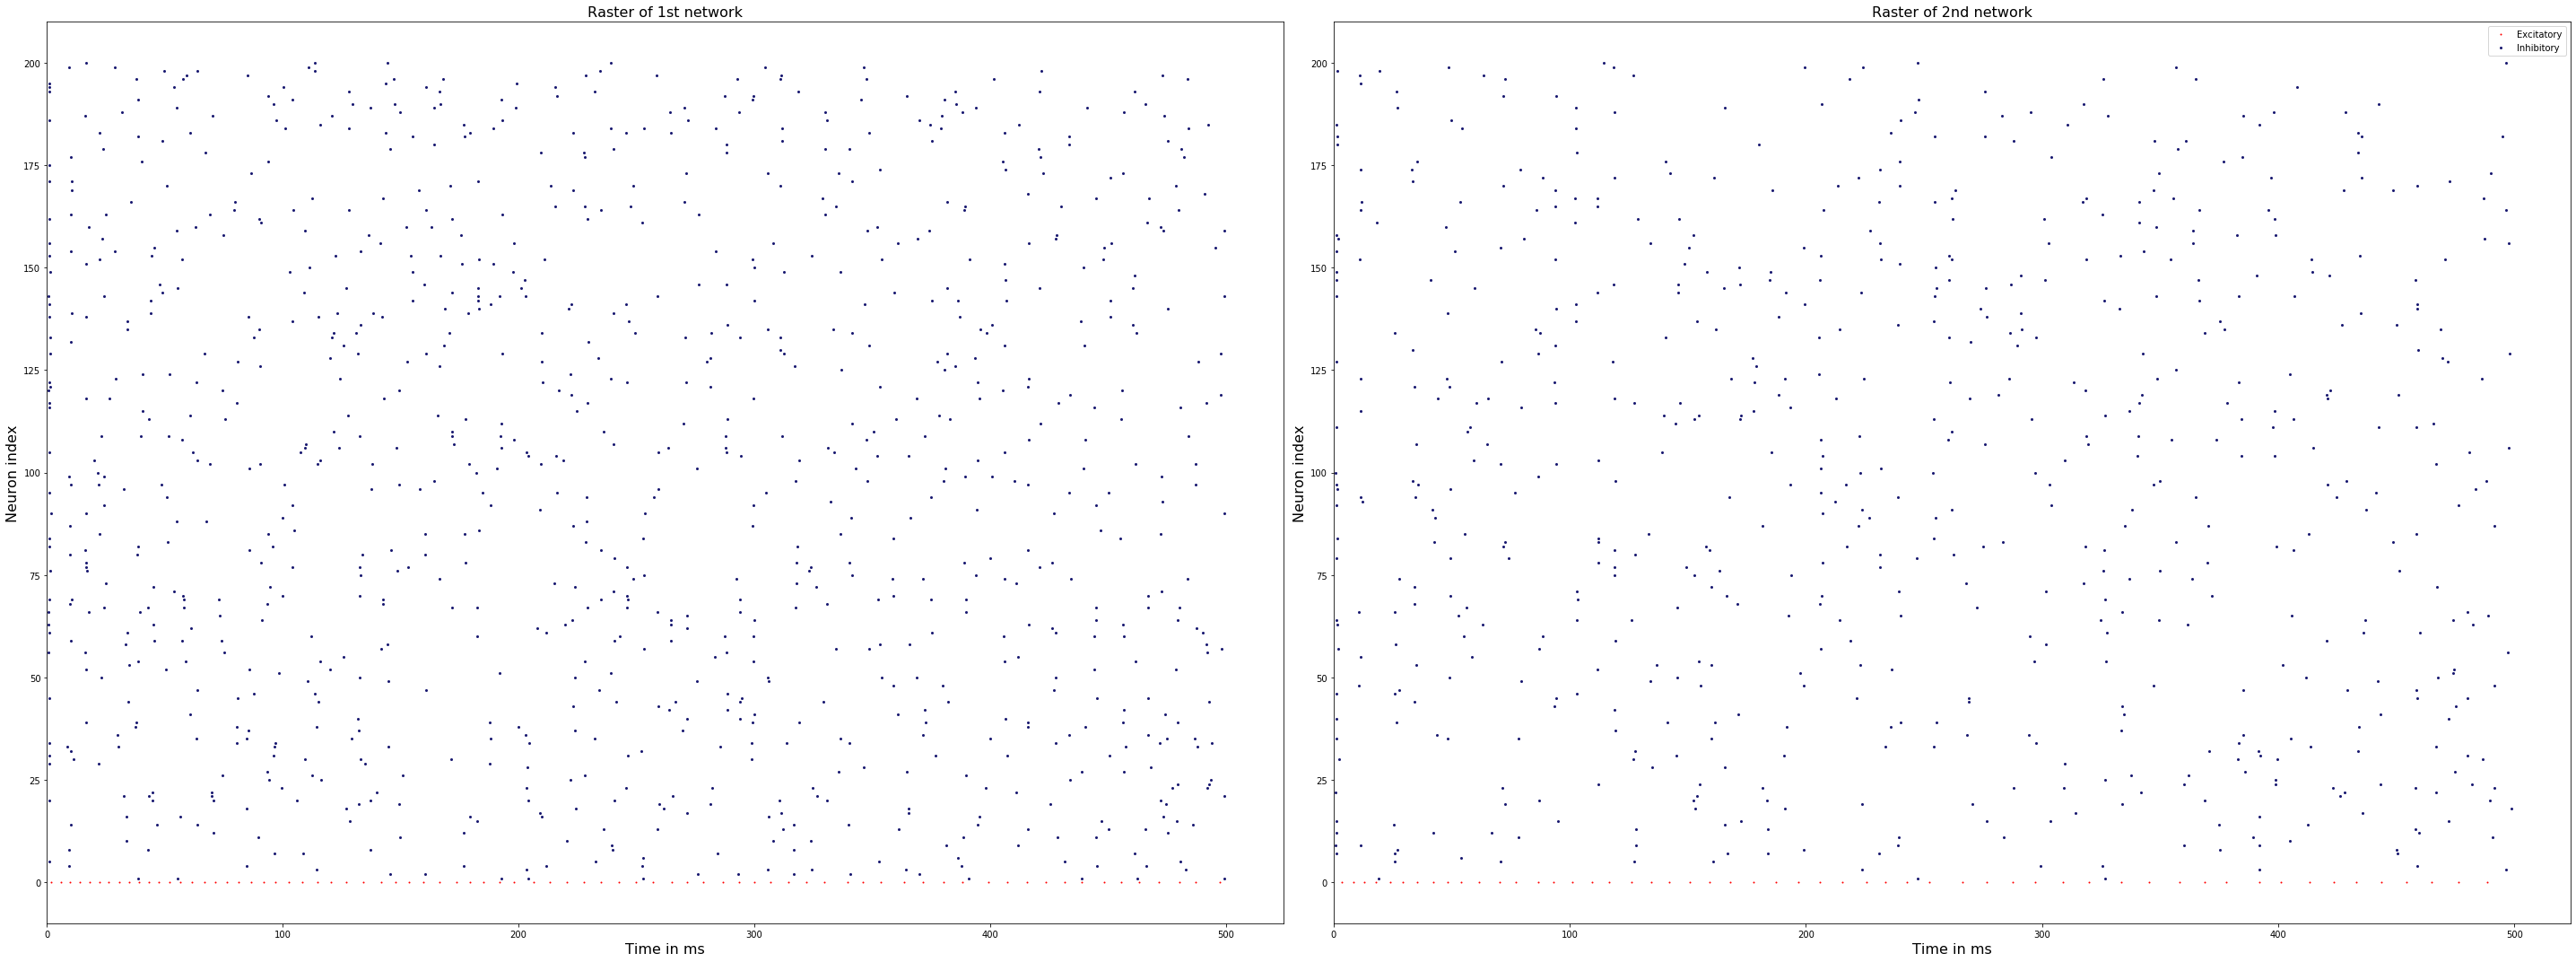

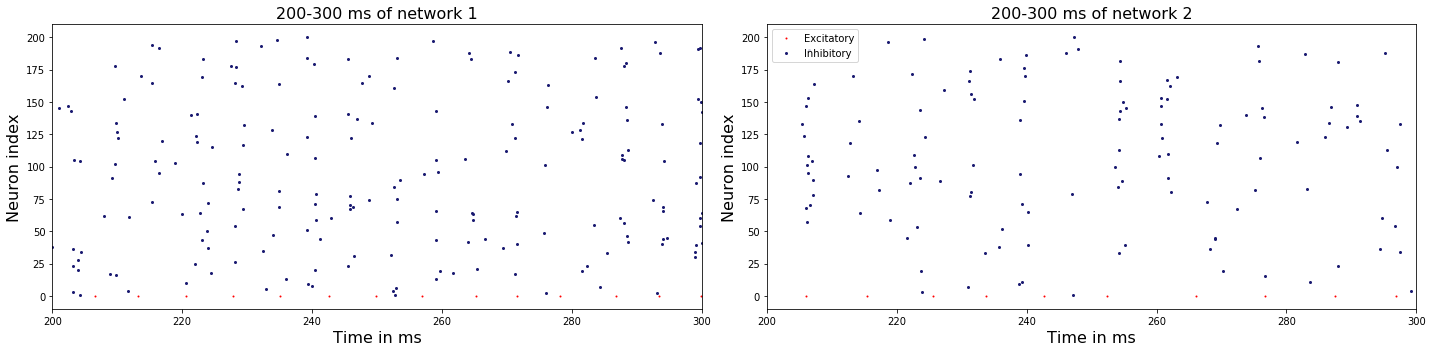

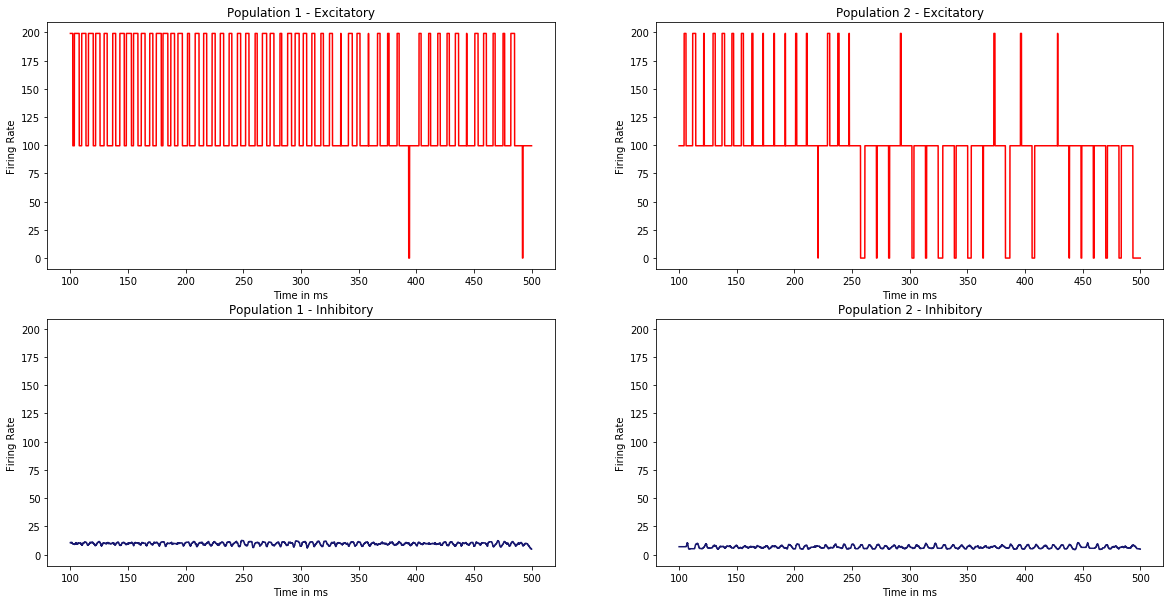

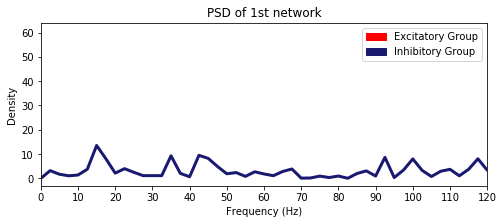

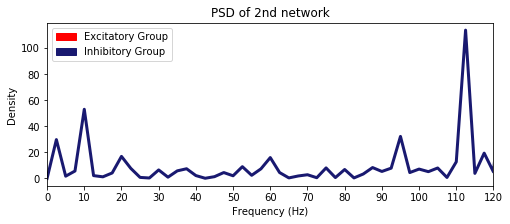

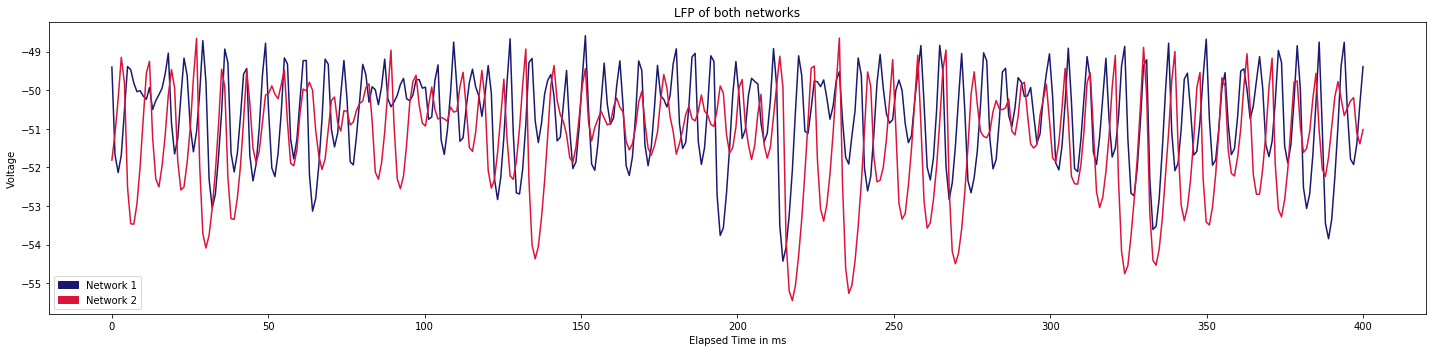

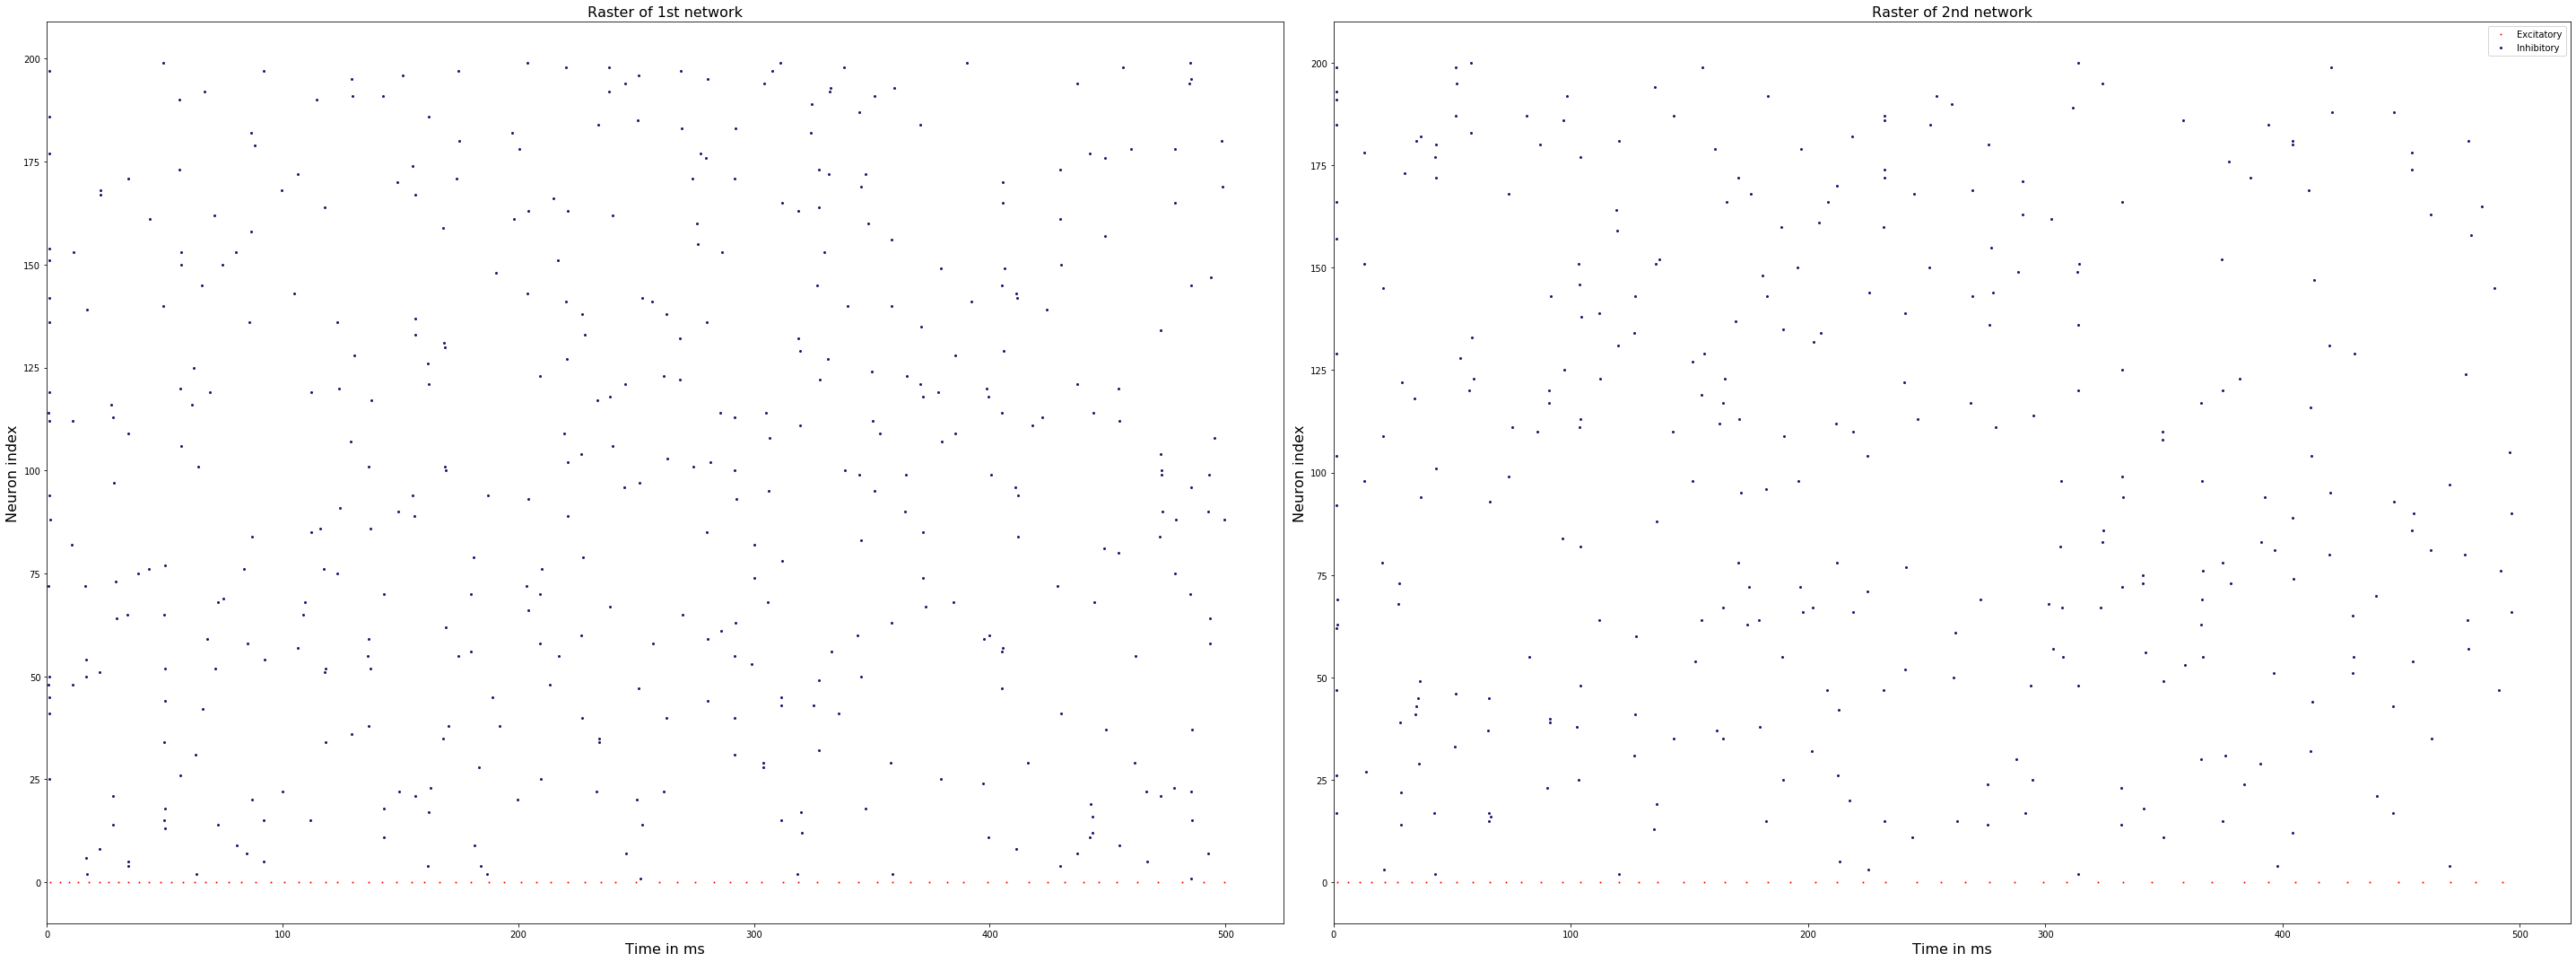

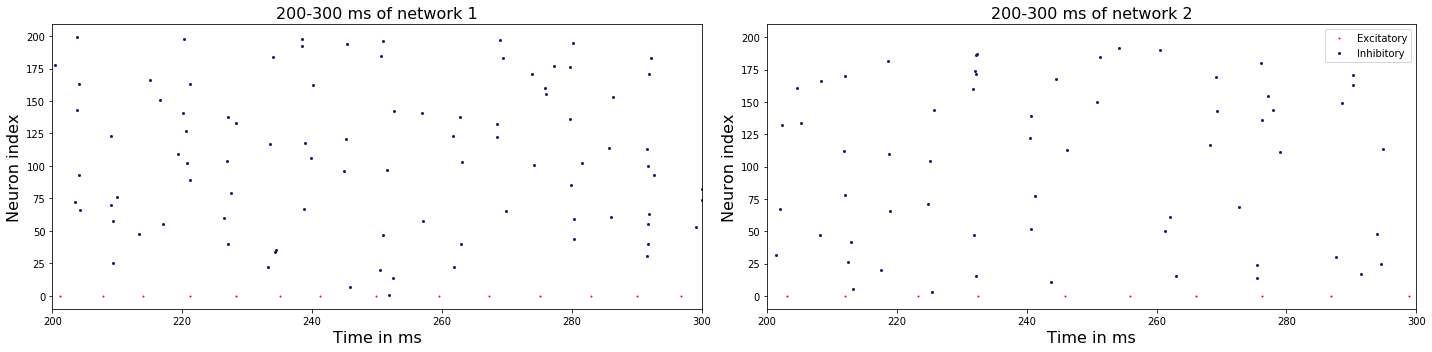

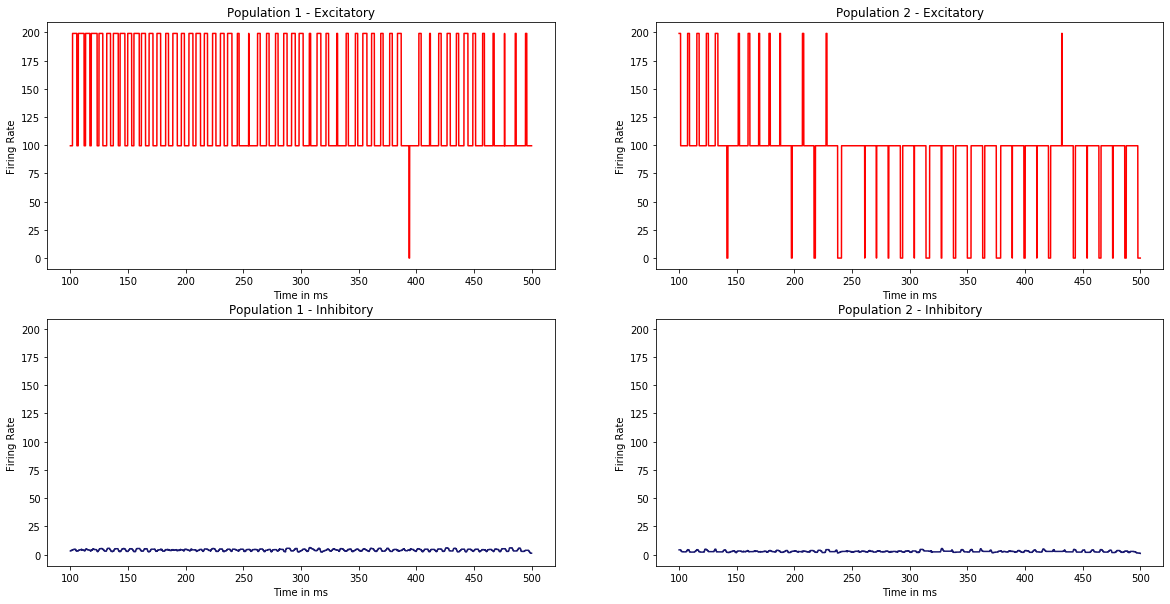

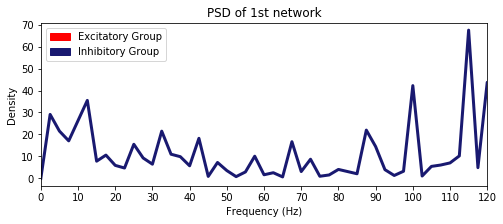

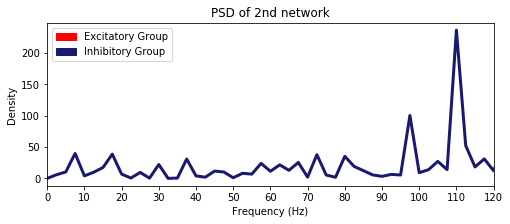

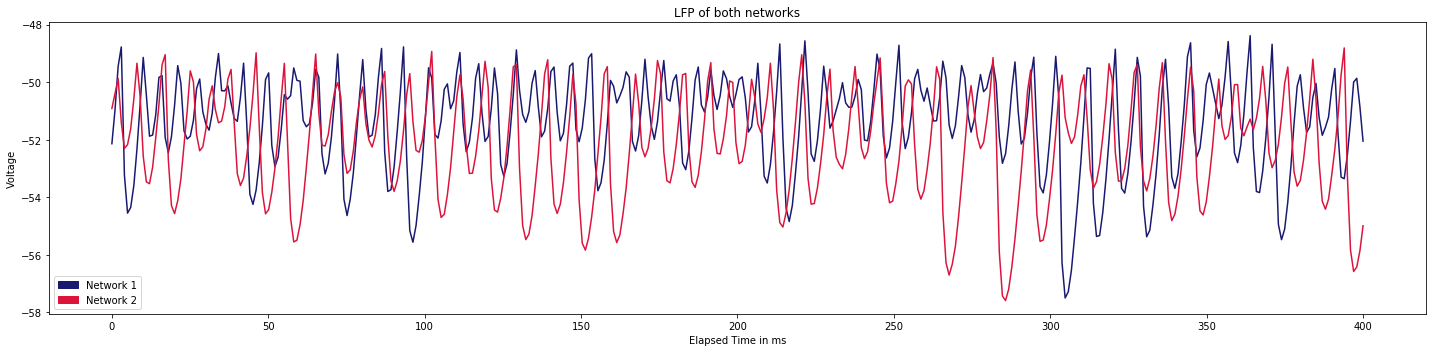

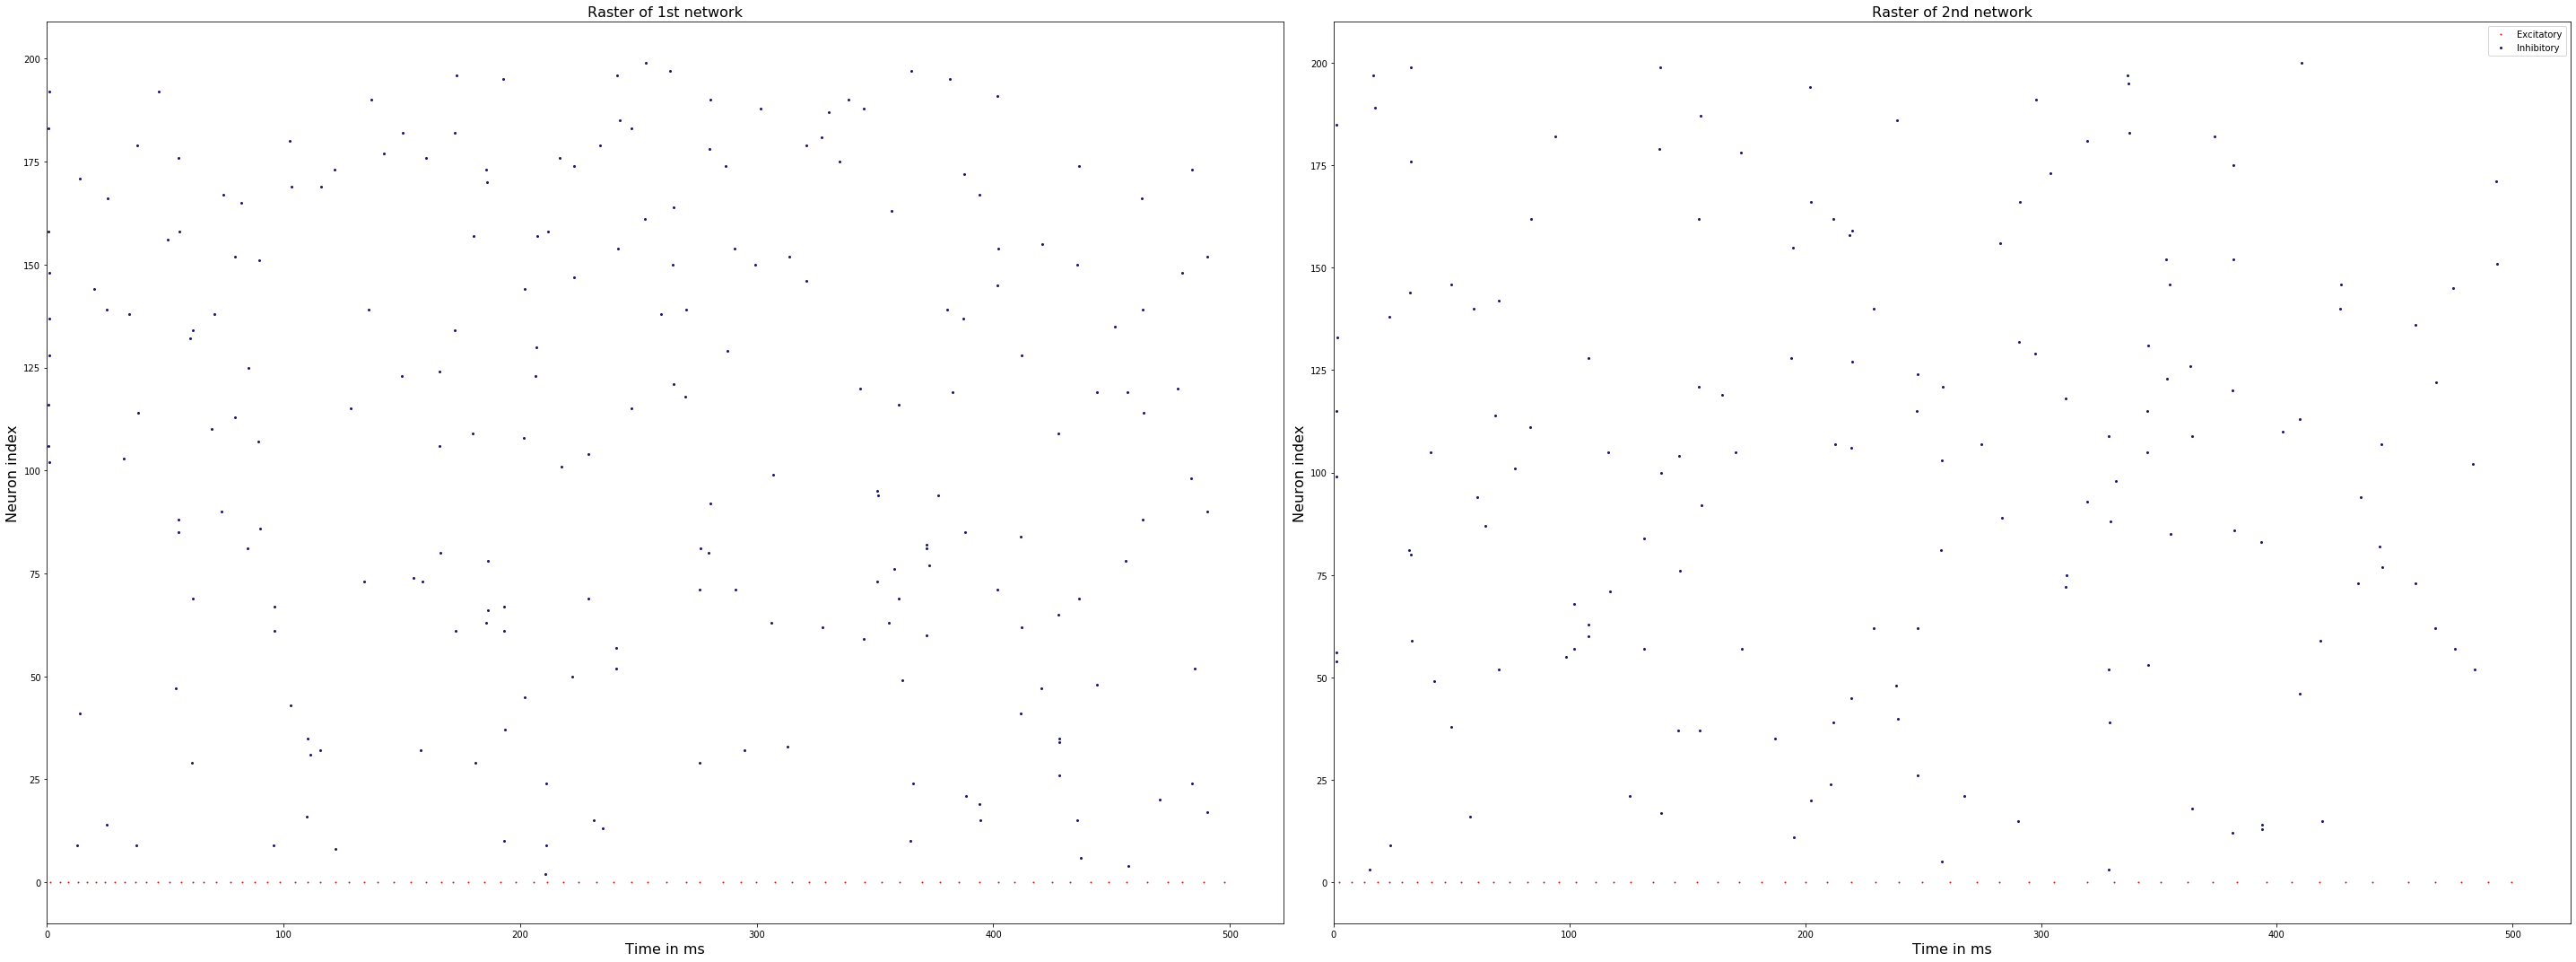

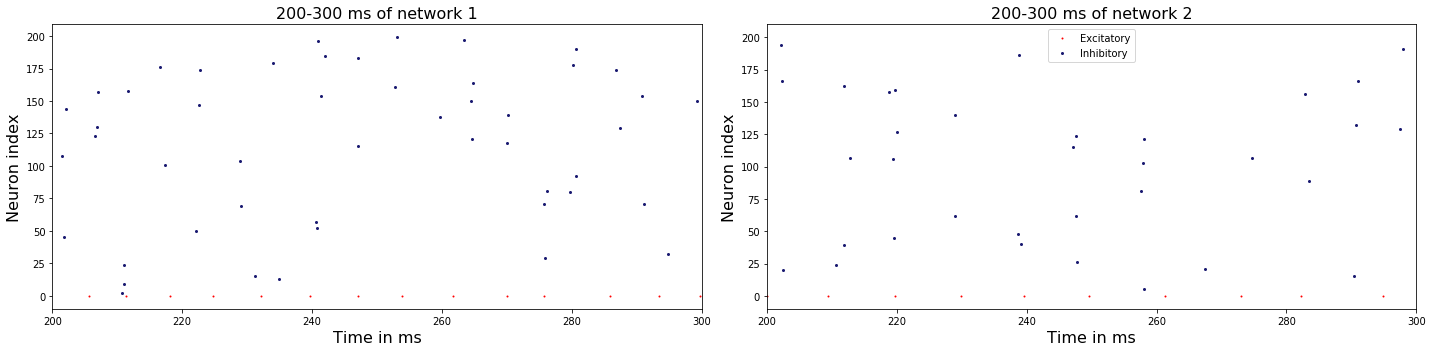

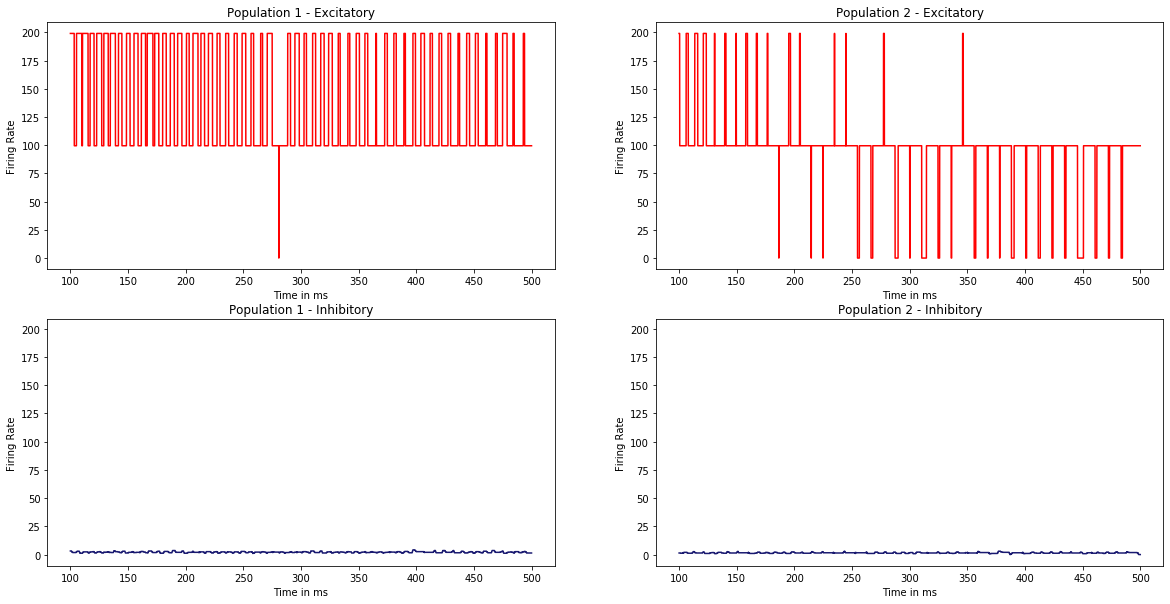

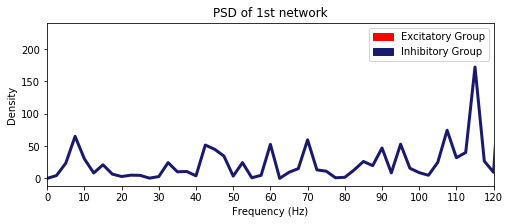

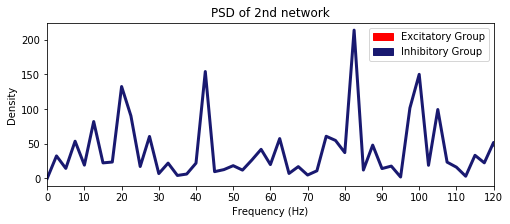

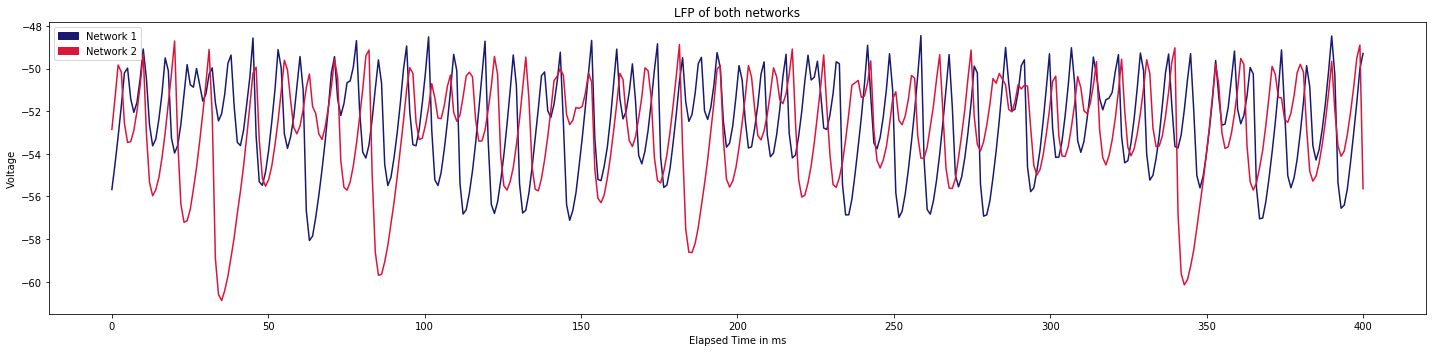

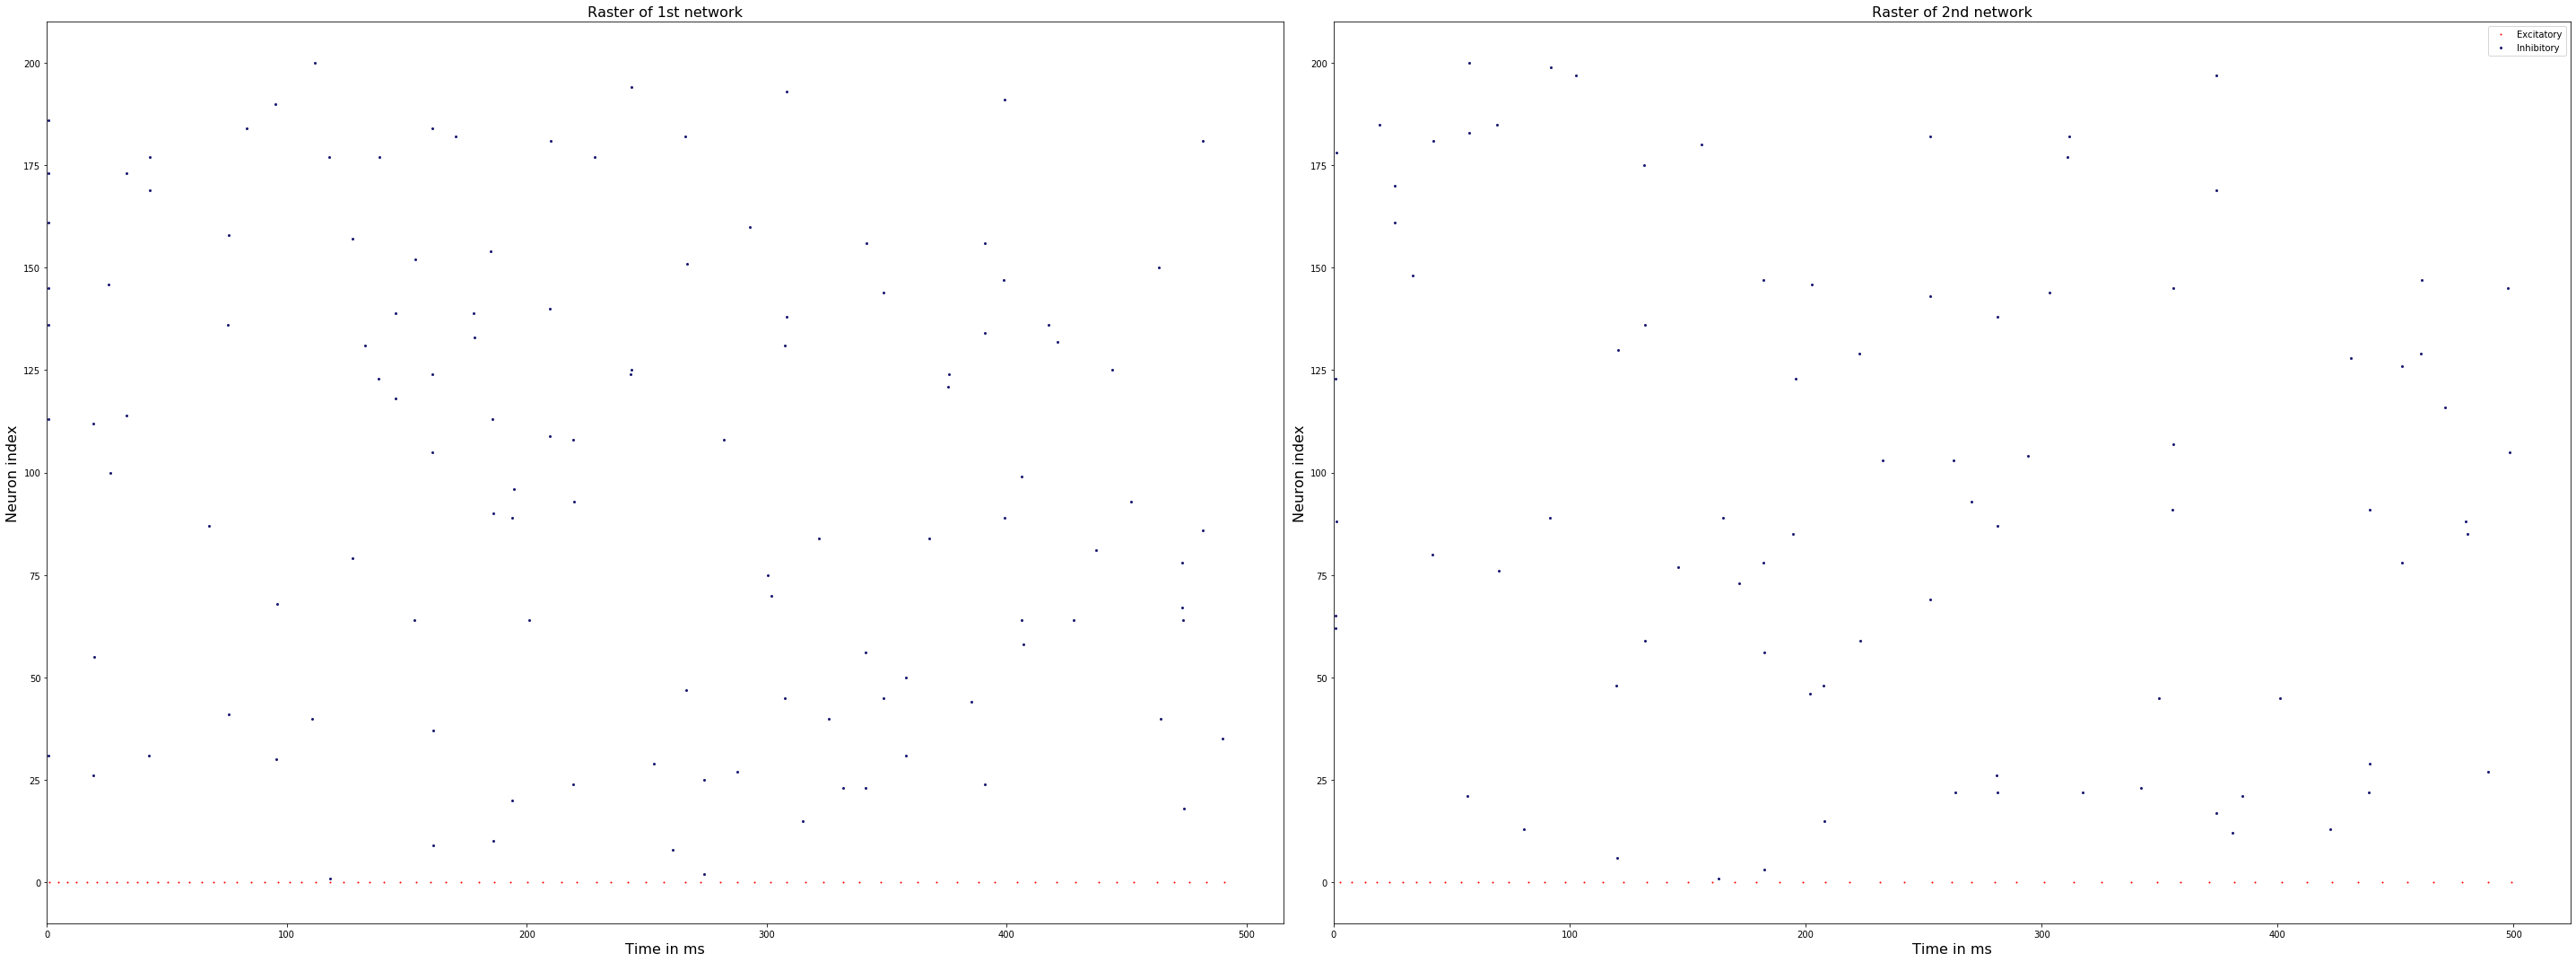

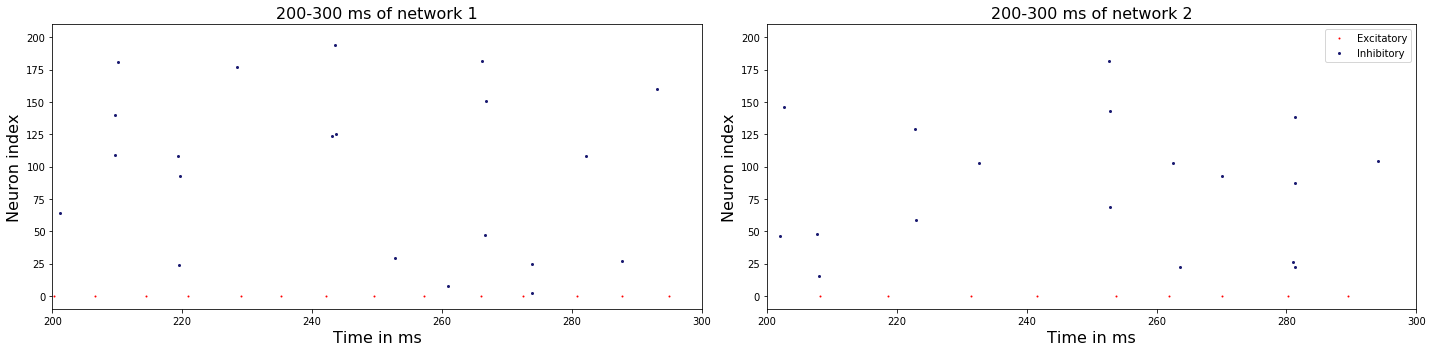

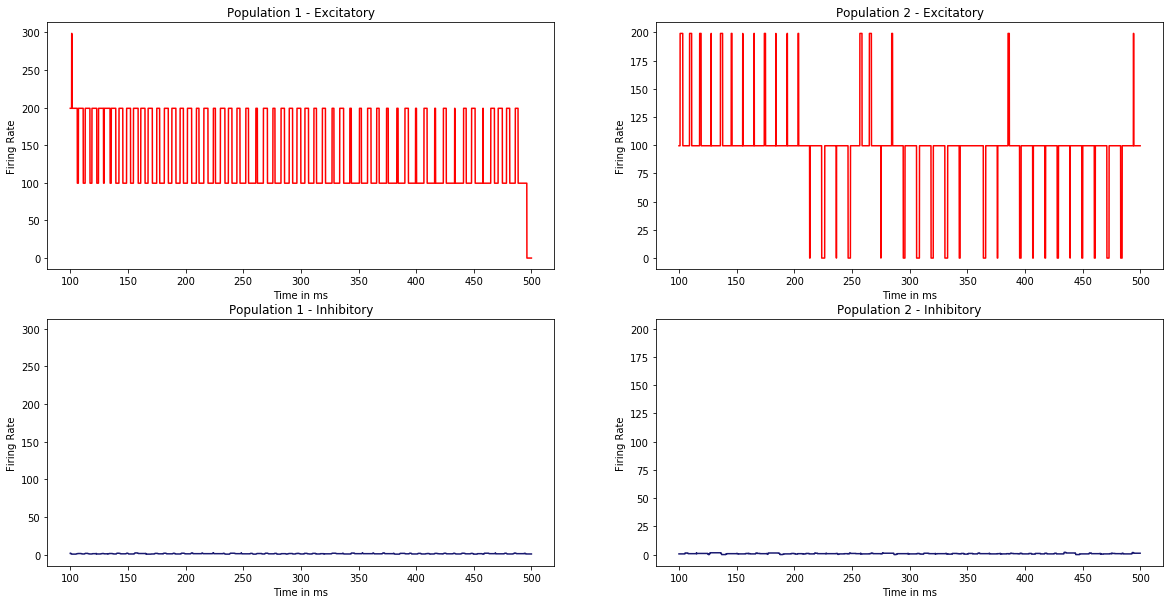

In [8]:
for m, v in zip(models, values):
    print(f"----- J_itoi: {v} ----- ")
    plots.plot_results(m, pop_rates=True, full_raster=True)
    plt.show()